In [1]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.6      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.3      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 1 Process of Forecasting 

 The process of producing forecasts for time series data can be broken down into a few steps:
 - Data Preparation.
 - Visualization of the data.
 - Model's Specification.
 - Model's Estimation (TRAINING DE MODEL)
 - Model's Evaluation (CHECK MODEL PERFORMANCE)
 - Model's Forecasting.

# 1.1 Data preparation

- loading in data. 
- identifying missing values. 
- filtering the time series, and other pre-processing tasks.

Use: tsibble and tidyverse package

In [2]:
global_economy[1:5,]

Country     Code Year GDP       Growth CPI Imports   Exports  Population
1 Afghanistan AFG  1960 537777811 NA     NA   7.024793 4.132233 8996351   
2 Afghanistan AFG  1961 548888896 NA     NA   8.097166 4.453443 9166764   
3 Afghanistan AFG  1962 546666678 NA     NA   9.349593 4.878051 9345868   
4 Afghanistan AFG  1963 751111191 NA     NA  16.863910 9.171601 9533954   
5 Afghanistan AFG  1964 800000044 NA     NA  18.055555 8.888893 9731361

In [3]:
gdppc <- global_economy %>%
 mutate(GDP_per_capita= GDP/ Population )

In [4]:
gdppc[1:5,]

Country     Code Year GDP       Growth CPI Imports   Exports  Population
1 Afghanistan AFG  1960 537777811 NA     NA   7.024793 4.132233 8996351   
2 Afghanistan AFG  1961 548888896 NA     NA   8.097166 4.453443 9166764   
3 Afghanistan AFG  1962 546666678 NA     NA   9.349593 4.878051 9345868   
4 Afghanistan AFG  1963 751111191 NA     NA  16.863910 9.171601 9533954   
5 Afghanistan AFG  1964 800000044 NA     NA  18.055555 8.888893 9731361   
  GDP_per_capita
1 59.77733      
2 59.87815      
3 58.49287      
4 78.78276      
5 82.20844

# 1.2 Visualization of the data

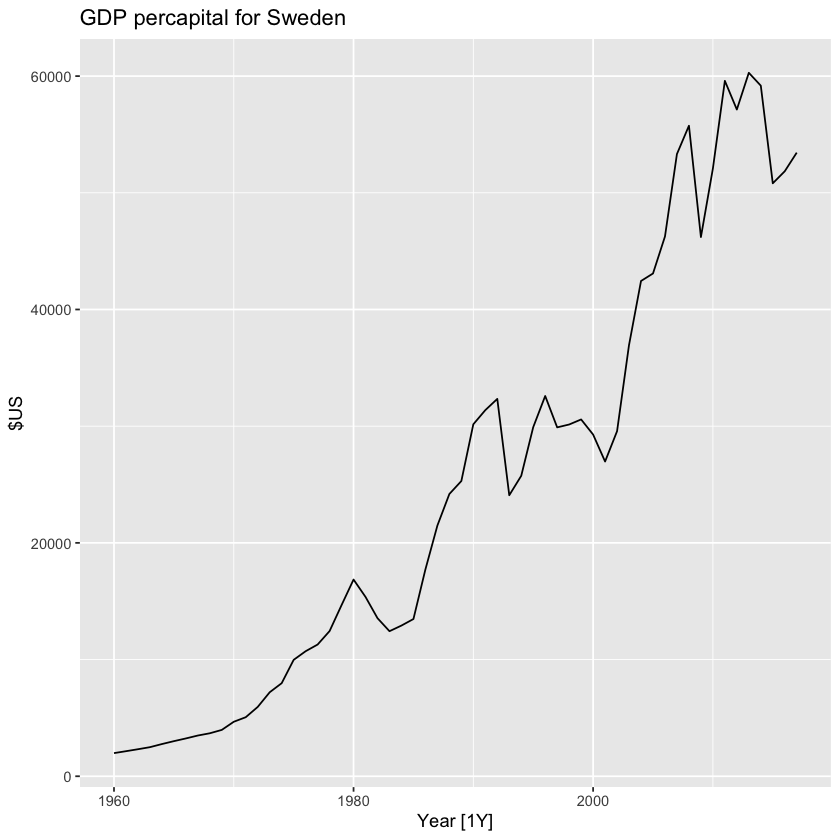

In [7]:
gdppc %>%
 filter(Country=="Sweden") %>%
 autoplot(GDP_per_capita) +
 labs(y="$US", title ="GDP percapital for Sweden")

# 1.3 Define a MODEL (SPECIFICATION)

In [8]:
TSLM(GDP_per_capita ~ trend())

<TSLM model definition>

- The model function is TSLM() (time series linear model).
- The response variable is GDP_per_capita and it is being modelled using trend() (a “special” function specifying a linear trend when it is used within TSLM()).

# 1.4 TRAIN de model (ESTIMATION)

In [9]:
fit <- gdppc %>%
 model(
     trend_model=TSLM(GDP_per_capita ~ trend()) 
  )

Warning message:
“7 errors (1 unique) encountered for trend_model
[7] 0 (non-NA) cases
”


- This fits a linear trend model to the GDP per capita data.
- model to each of the 263 countries in the dataset

In [13]:
fit

Country                  trend_model 
1   Afghanistan              <TSLM>      
2   Albania                  <TSLM>      
3   Algeria                  <TSLM>      
4   American Samoa           <TSLM>      
5   Andorra                  <TSLM>      
6   Angola                   <TSLM>      
7   Antigua and Barbuda      <TSLM>      
8   Arab World               <TSLM>      
9   Argentina                <TSLM>      
10  Armenia                  <TSLM>      
11  Aruba                    <TSLM>      
12  Australia                <TSLM>      
13  Austria                  <TSLM>      
14  Azerbaijan               <TSLM>      
15  Bahamas, The             <TSLM>      
16  Bahrain                  <TSLM>      
17  Bangladesh               <TSLM>      
18  Barbados                 <TSLM>      
19  Belarus                  <TSLM>      
20  Belgium                  <TSLM>      
21  Belize                   <TSLM>      
22  Benin                    <TSLM>      
23  Bermuda                  <TSLM>      
24  Bhutan                   <TSLM>      
25  Bolivia                  <TSLM>      
26  Bosnia and Herzegovina   <TSLM>      
27  Botswana                 <TSLM>      
28  Brazil                   <TSLM>      
29  British Virgin Islands   <NULL model>
30  Brunei Darussalam        <TSLM>      
⋮   ⋮                        ⋮           
234 Syrian Arab Republic     <TSLM>      
235 Tajikistan               <TSLM>      
236 Tanzania                 <TSLM>      
237 Thailand                 <TSLM>      
238 Timor-Leste              <TSLM>      
239 Togo                     <TSLM>      
240 Tonga                    <TSLM>      
241 Trinidad and Tobago      <TSLM>      
242 Tunisia                  <TSLM>      
243 Turkey                   <TSLM>      
244 Turkmenistan             <TSLM>      
245 Turks and Caicos Islands <NULL model>
246 Tuvalu                   <TSLM>      
247 Uganda                   <TSLM>      
248 Ukraine                  <TSLM>      
249 United Arab Emirates     <TSLM>      
250 United Kingdom           <TSLM>      
251 United States            <TSLM>      
252 Upper middle income      <TSLM>      
253 Uruguay                  <TSLM>      
254 Uzbekistan               <TSLM>      
255 Vanuatu                  <TSLM>      
256 Venezuela, RB            <TSLM>      
257 Vietnam                  <TSLM>      
258 Virgin Islands (U.S.)    <TSLM>      
259 West Bank and Gaza       <TSLM>      
260 World                    <TSLM>      
261 Yemen, Rep.              <TSLM>      
262 Zambia                   <TSLM>      
263 Zimbabwe                 <TSLM>

# 1.5 Check model performance (EVALUATION)

- Check how well it has performed on the data.
- Use diagnostic tools available to check model behaviour.
- Accuracy measures that allow one model to be compared against another

# 1.6 Produce forecasts (FORECASTING)

In [14]:
fit %>% forecast (h= "3 years" )
# this produce a foecast table

Country               .model      Year GDP_per_capita    .mean     
1   Afghanistan           trend_model 2018 N(526, 9653)        526.1364
2   Afghanistan           trend_model 2019 N(534, 9689)        534.1668
3   Afghanistan           trend_model 2020 N(542, 9727)        542.1972
4   Albania               trend_model 2018 N(4716, 476419)    4716.3414
5   Albania               trend_model 2019 N(4867, 481086)    4867.1832
6   Albania               trend_model 2020 N(5018, 486012)    5018.0250
7   Algeria               trend_model 2018 N(4410, 643094)    4409.6174
8   Algeria               trend_model 2019 N(4489, 645311)    4488.8957
9   Algeria               trend_model 2020 N(4568, 647602)    4568.1740
10  American Samoa        trend_model 2018 N(12491, 652926)  12490.9568
11  American Samoa        trend_model 2019 N(12749, 680038)  12748.7107
12  American Samoa        trend_model 2020 N(13006, 710161)  13006.4647
13  Andorra               trend_model 2018 N(44586, 3.1e+07) 44585.7390
14  Andorra               trend_model 2019 N(45522, 3.1e+07) 45521.9304
15  Andorra               trend_model 2020 N(46458, 3.1e+07) 46458.1218
16  Angola                trend_model 2018 N(4157, 1077774)   4157.2745
17  Angola                trend_model 2019 N(4280, 1086277)   4280.3136
18  Angola                trend_model 2020 N(4403, 1095205)   4403.3527
19  Antigua and Barbuda   trend_model 2018 N(15628, 1e+06)   15627.8046
20  Antigua and Barbuda   trend_model 2019 N(15976, 1e+06)   15975.5920
21  Antigua and Barbuda   trend_model 2020 N(16323, 1053418) 16323.3794
22  Arab World            trend_model 2018 N(6146, 965890)    6145.9572
23  Arab World            trend_model 2019 N(6279, 970347)    6278.9983
24  Arab World            trend_model 2020 N(6412, 974974)    6412.0394
25  Argentina             trend_model 2018 N(11290, 3628887) 11290.3395
26  Argentina             trend_model 2019 N(11503, 3642290) 11503.2098
27  Argentina             trend_model 2020 N(11716, 3656156) 11716.0801
28  Armenia               trend_model 2018 N(4265, 4e+05)     4264.8212
29  Armenia               trend_model 2019 N(4429, 4e+05)     4429.2877
30  Armenia               trend_model 2020 N(4594, 408968)    4593.7541
⋮   ⋮                     ⋮           ⋮    ⋮                 ⋮         
760 Uzbekistan            trend_model 2018 N(1801, 139417)    1801.1952
761 Uzbekistan            trend_model 2019 N(1858, 141406)    1858.3399
762 Uzbekistan            trend_model 2020 N(1915, 143528)    1915.4846
763 Vanuatu               trend_model 2018 N(3062, 114786)    3061.7746
764 Vanuatu               trend_model 2019 N(3128, 115647)    3128.1715
765 Vanuatu               trend_model 2020 N(3195, 116550)    3194.5685
766 Venezuela, RB         trend_model 2018 N(9760, 5127465)   9759.7564
767 Venezuela, RB         trend_model 2019 N(9943, 5148897)   9943.0046
768 Venezuela, RB         trend_model 2020 N(10126, 5171008) 10126.2528
769 Vietnam               trend_model 2018 N(1862, 129032)    1862.0457
770 Vietnam               trend_model 2019 N(1925, 130372)    1925.0424
771 Vietnam               trend_model 2020 N(1988, 131788)    1988.0391
772 Virgin Islands (U.S.) trend_model 2018 N(42296, 2.3e+07) 42295.9077
773 Virgin Islands (U.S.) trend_model 2019 N(43125, 2.3e+07) 43124.7991
774 Virgin Islands (U.S.) trend_model 2020 N(43954, 2.3e+07) 43953.6906
775 West Bank and Gaza    trend_model 2018 N(3018, 122447)    3017.8130
776 West Bank and Gaza    trend_model 2019 N(3107, 124798)    3106.8799
777 West Bank and Gaza    trend_model 2020 N(3196, 127330)    3195.9469
778 World                 trend_model 2018 N(10089, 786226)  10089.3637
779 World                 trend_model 2019 N(10283, 788937)  10283.1540
780 World                 trend_model 2020 N(10477, 791737)  10476.9442
781 Yemen, Rep.           trend_model 2018 N(1564, 43995)     1563.5622
782 Yemen, Rep.           trend_model 2019 N(1614, 44623)     1613.9137
783 Yemen, Rep.           trend_model 2020 N

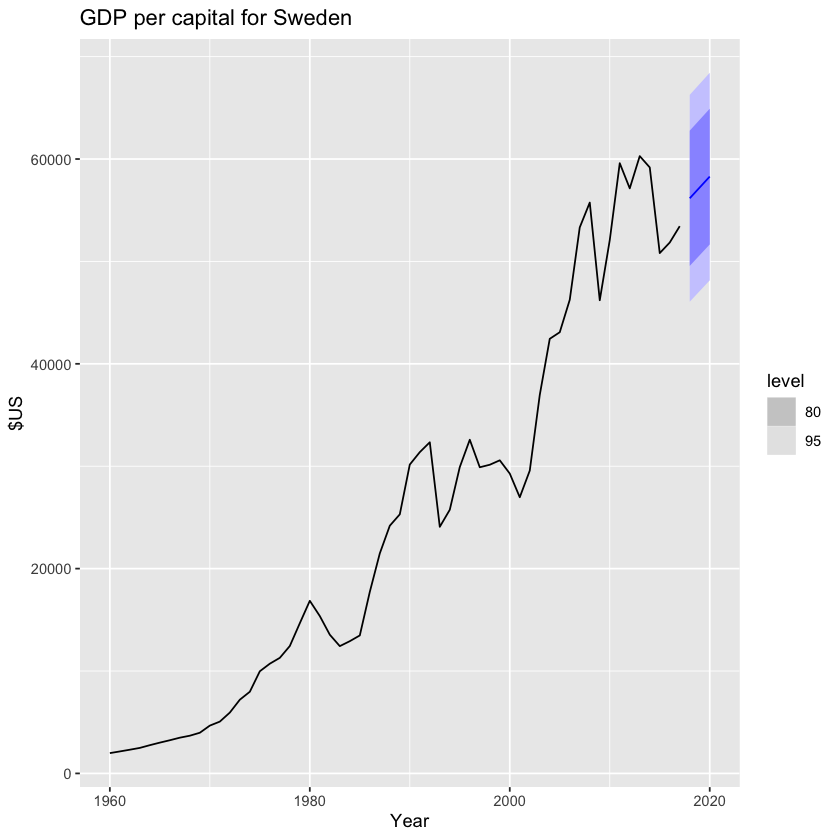

In [15]:
fit %>%
 forecast(h="3 years") %>%
 filter(Country == "Sweden") %>%
 autoplot(gdppc) +
 labs(y = "$US", title="GDP per capital for Sweden")

# 2 Some simple forecasting methods

- Average Method.
- Naive Method.
- Seasonal Naive Method.
- Drift Method.

This will use as a bechmarks.

In [20]:
aus_production[1:5,]

Quarter Beer Tobacco Bricks Cement Electricity Gas
1 1956 Q1 284  5225    189    465    3923        5  
2 1956 Q2 213  5178    204    532    4436        6  
3 1956 Q3 227  5297    208    561    4806        7  
4 1956 Q4 308  5681    197    570    4418        6  
5 1957 Q1 262  5577    187    529    4339        5

In [21]:
bricks<- aus_production %>%
 filter_index("1970 Q1" ~ "2004 Q1" )

In [22]:
bricks[1:5,]

Quarter Beer Tobacco Bricks Cement Electricity Gas
1 1970 Q1 387  6807    386    1049   12328       12 
2 1970 Q2 357  7612    428    1134   14493       18 
3 1970 Q3 374  7862    434    1229   15664       23 
4 1970 Q4 466  7126    417    1188   13781       20 
5 1971 Q1 410  7255    385    1058   13299       19

# 2.1 Average Method.

In [23]:
bricks %>% model(MEAN(Bricks))

MEAN(Bricks)
1 <MEAN>

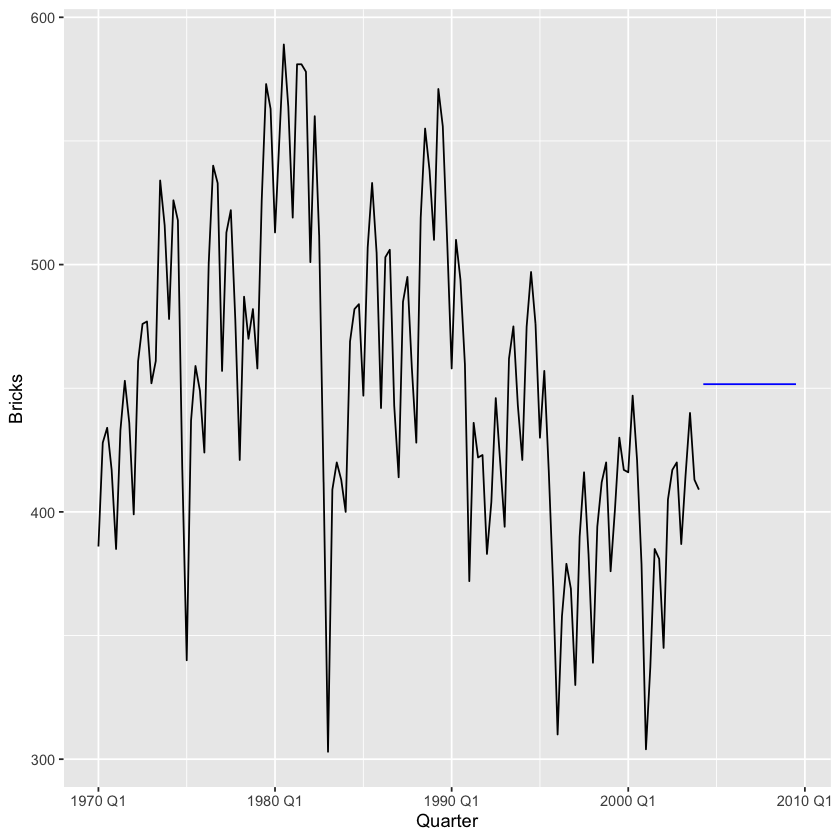

In [47]:
bricks<- aus_production %>%
 filter_index("1970 Q1" ~ "2004 Q1" )

bricks_fit <- bricks %>%
  model(
    Mean = MEAN(Bricks),
  )

bricks_fc <- bricks_fit %>% forecast(h = 22)

bricks_fc %>%
  autoplot(bricks, level = NULL)

# 2.2 Naive Method.

In [42]:
bricks %>% model(NAIVE(Bricks))


NAIVE(Bricks)
1 <NAIVE>

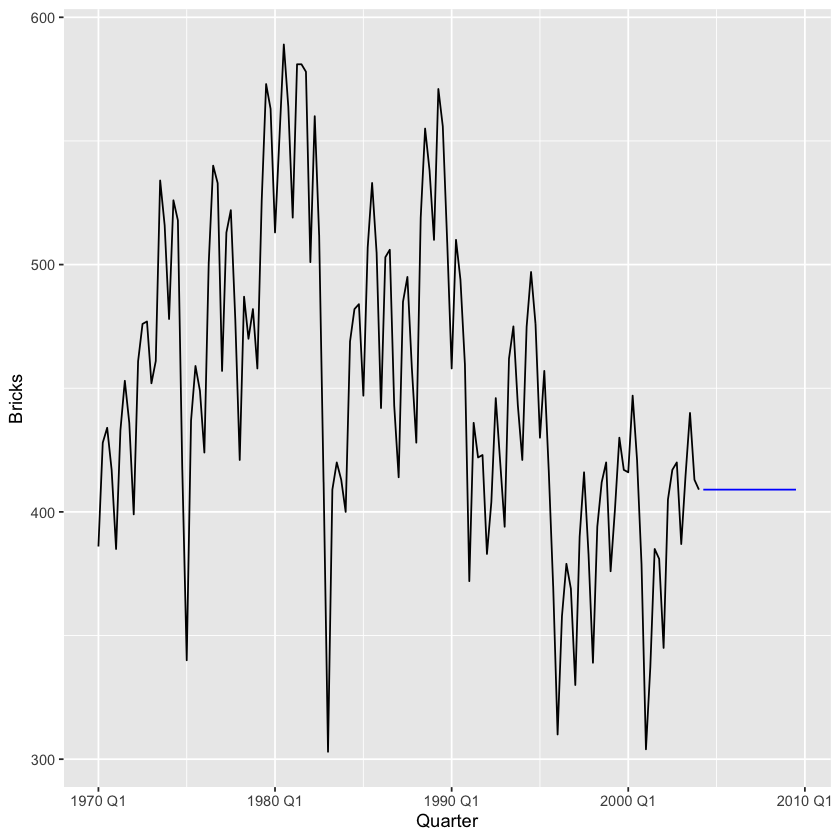

In [46]:
bricks<- aus_production %>%
 filter_index("1970 Q1" ~ "2004 Q1" )

bricks_fit <- bricks %>%
  model(
    Naive = NAIVE(Bricks),
  )

bricks_fc <- bricks_fit %>% forecast(h = 22)

bricks_fc %>%
  autoplot(bricks, level = NULL)

Naïve forecast is optimal when data follow a random walk

# 2.3 Seasonal Naive Method.

- For example, with monthly data, the forecast for all future February values is equal to the last observed February value.
- With quarterly data, the forecast of all future Q2 values is equal to the last observed Q2 value. 

In [48]:
bricks %>% model(SNAIVE(Bricks ~ lag("year")))

SNAIVE(Bricks ~ lag("year"))
1 <SNAIVE>

The lag() function is optional here as bricks is quarterly data and

so a Seasonal naïve method will need a one-year lag. 

However, for some time series there is more than one seasonal period, and then the required lag must be specified

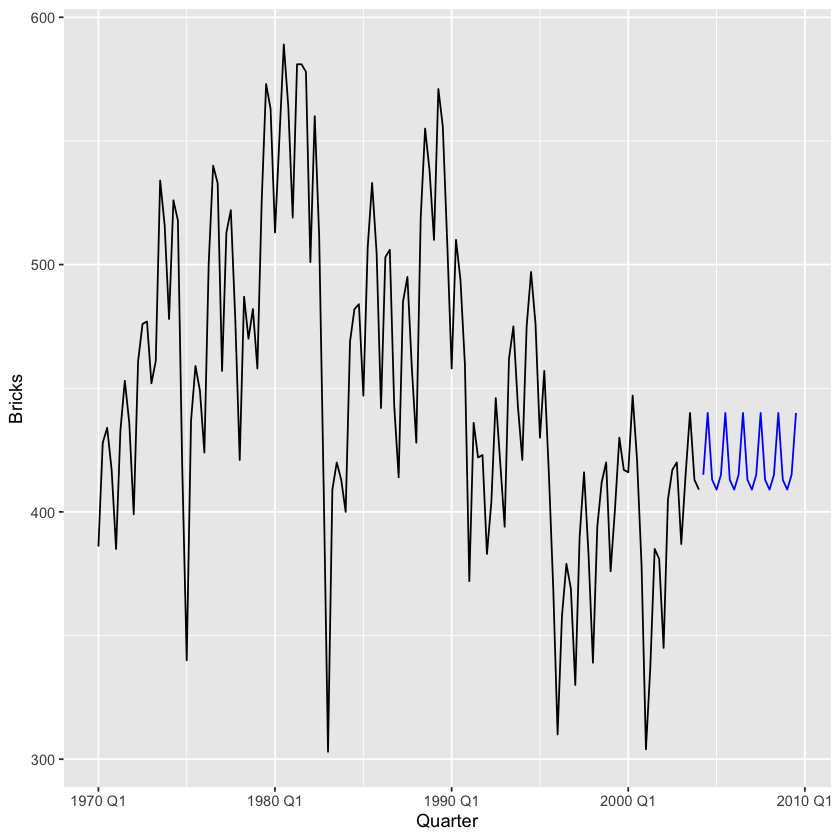

In [49]:
bricks<- aus_production %>%
 filter_index("1970 Q1" ~ "2004 Q1" )

bricks_fit <- bricks %>%
  model(
    SNaive = SNAIVE(Bricks ~ lag("year")),
  )

bricks_fc <- bricks_fit %>% forecast(h = 22)

bricks_fc %>%
  autoplot(bricks, level = NULL)

# 2.4 Drift Method.

This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future

In [50]:
bricks %>% model(RW(Bricks ~ drift()))


RW(Bricks ~ drift())
1 <RW w/ drift>

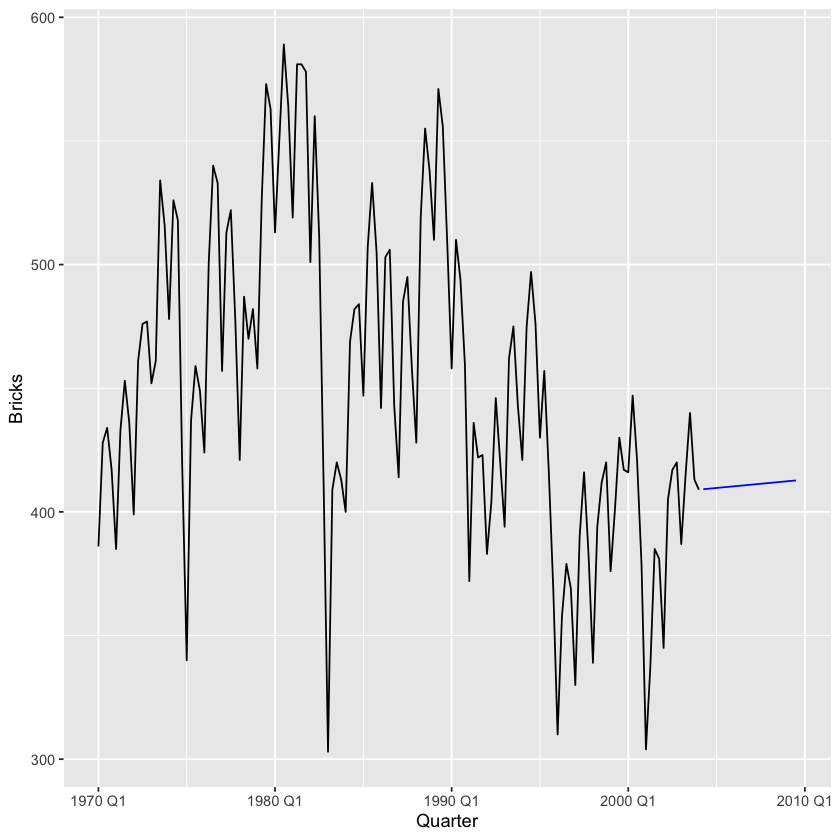

In [52]:
bricks<- aus_production %>%
 filter_index("1970 Q1" ~ "2004 Q1" )

bricks_fit <- bricks %>%
  model(
    Drift = RW(Bricks ~ drift() ),
  )

bricks_fc <- bricks_fit %>% forecast(h = 22)

bricks_fc %>%
  autoplot(bricks, level = NULL)

# Example:

Plot variable not specified, automatically selected `.vars = Beer`



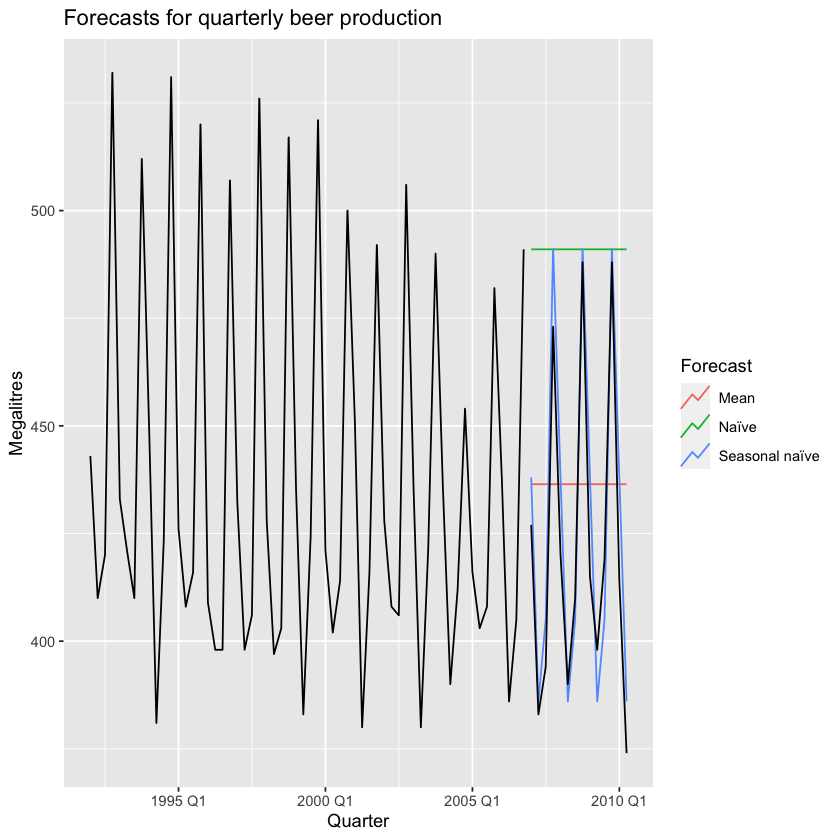

In [53]:
# Set training data from 1992 to 2006
train <- aus_production %>%
  filter_index("1992 Q1" ~ "2006 Q4")
# Fit the models
beer_fit <- train %>%
  model(
    Mean = MEAN(Beer),
    `Naïve` = NAIVE(Beer),
    `Seasonal naïve` = SNAIVE(Beer)
  )
# Generate forecasts for 14 quarters
beer_fc <- beer_fit %>% forecast(h = 14)
# Plot forecasts against actual values
beer_fc %>%
  autoplot(train, level = NULL) +
  autolayer(
    filter_index(aus_production, "2007 Q1" ~ .),
    colour = "black"
  ) +
  labs(
    y = "Megalitres",
    title = "Forecasts for quarterly beer production"
  ) +
  guides(colour = guide_legend(title = "Forecast"))

- Only the seasonal naïve forecasts are close to the observed values from 2007 onwards.

 Example: Daily closing stock price of Google Inc from the NASDAQ exchange for all trading days in 2015

In [54]:
gafa_stock[1:5,]

Symbol Date       Open     High     Low      Close    Adj_Close Volume   
1 AAPL   2014-01-02 79.38286 79.57571 78.86000 79.01857 66.96433   58671200
2 AAPL   2014-01-03 78.98000 79.10000 77.20428 77.28286 65.49342   98116900
3 AAPL   2014-01-06 76.77857 78.11429 76.22857 77.70428 65.85053  103152700
4 AAPL   2014-01-07 77.76000 77.99429 76.84571 77.14857 65.37959   79302300
5 AAPL   2014-01-08 76.97285 77.93714 76.95571 77.63715 65.79363   64632400

In [55]:
google_stock <- gafa_stock %>%
 filter(Symbol=="GOOG", year(Date)>=2015) %>%
 mutate(day =row_number())

In [56]:
google_stock[1:5,]

Symbol Date       Open     High     Low      Close    Adj_Close Volume  day
1 GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600 1  
2 GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800 2  
3 GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900 3  
4 GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100 4  
5 GOOG   2015-01-08 495.2645 500.7245 488.3128 499.9289 499.9289  3353600 5

In [58]:
# Re-index based on trading days:
google_stock <- gafa_stock %>%
 filter(Symbol=="GOOG", year(Date)>=2015) %>%
 mutate(day =row_number()) %>%
 update_tsibble(index=day,regular= TRUE)

In [59]:
google_stock[1:5,]

Symbol Date       Open     High     Low      Close    Adj_Close Volume  day
1 GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600 1  
2 GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800 2  
3 GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900 3  
4 GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100 4  
5 GOOG   2015-01-08 495.2645 500.7245 488.3128 499.9289 499.9289  3353600 5

In [62]:
# filter the year of interest:
google_2015<-google_stock %>%
 filter(year(Date)==2015)

The google_2015 subset of the gafa_stock data, includes daily closing stock price of Google Inc from the NASDAQ exchange for all trading days in 2015

In [64]:
google_2015[1:5,]

Symbol Date       Open     High     Low      Close    Adj_Close Volume  day
1 GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600 1  
2 GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800 2  
3 GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900 3  
4 GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100 4  
5 GOOG   2015-01-08 495.2645 500.7245 488.3128 499.9289 499.9289  3353600 5

In [67]:
# Fit the models:

google_fit <- google_2015 %>%
 model(
  Mean=MEAN(Close),
  `Naive`=NAIVE(Close),
  Drift=NAIVE(Close ~ drift())   
 )


In [68]:
google_fit

Symbol Mean   Naive   Drift        
1 GOOG   <MEAN> <NAIVE> <RW w/ drift>

In [73]:
# Produce forecasts for the trading days in January 2016
google_jan_2016<- google_stock %>%
 filter( yearmonth(Date) == yearmonth("2016 Jan"))

google_fc <-  google_fit %>%
 forecast(newdata = google_jan_2016)

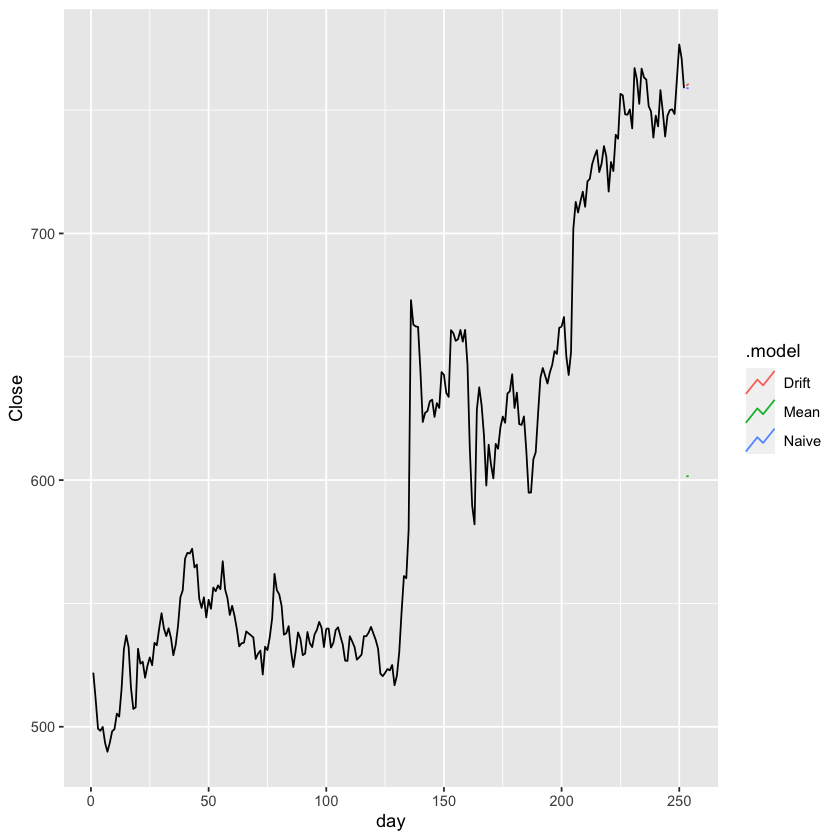

In [74]:
google_fc %>%
  autoplot(google_2015, level = NULL)

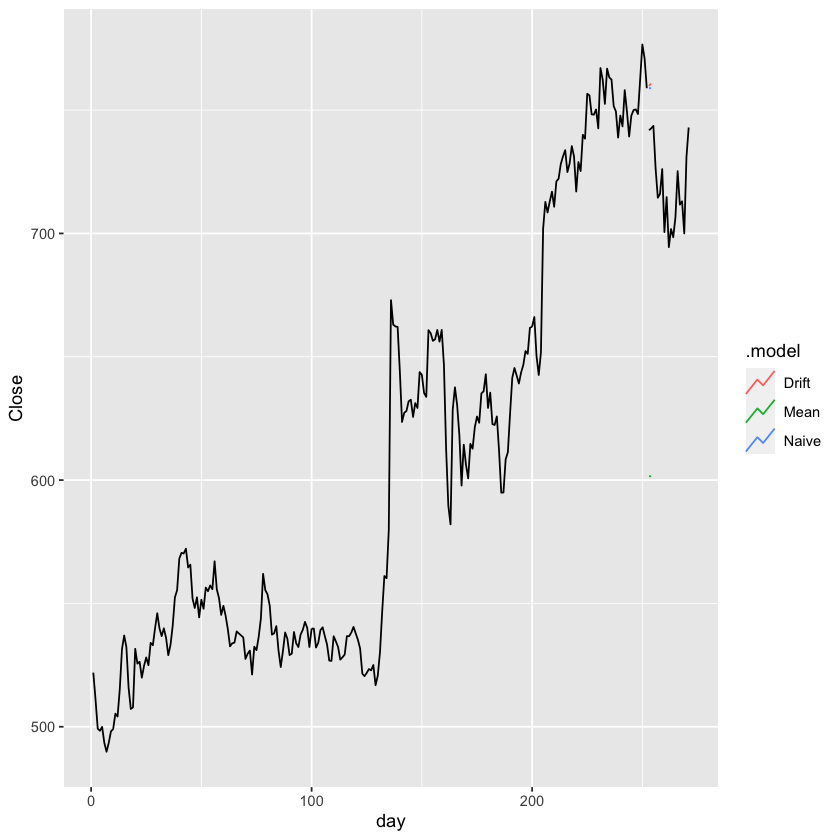

In [75]:
google_fc %>%
  autoplot(google_2015, level = NULL) +
  autolayer(google_jan_2016, Close, colour = "black")

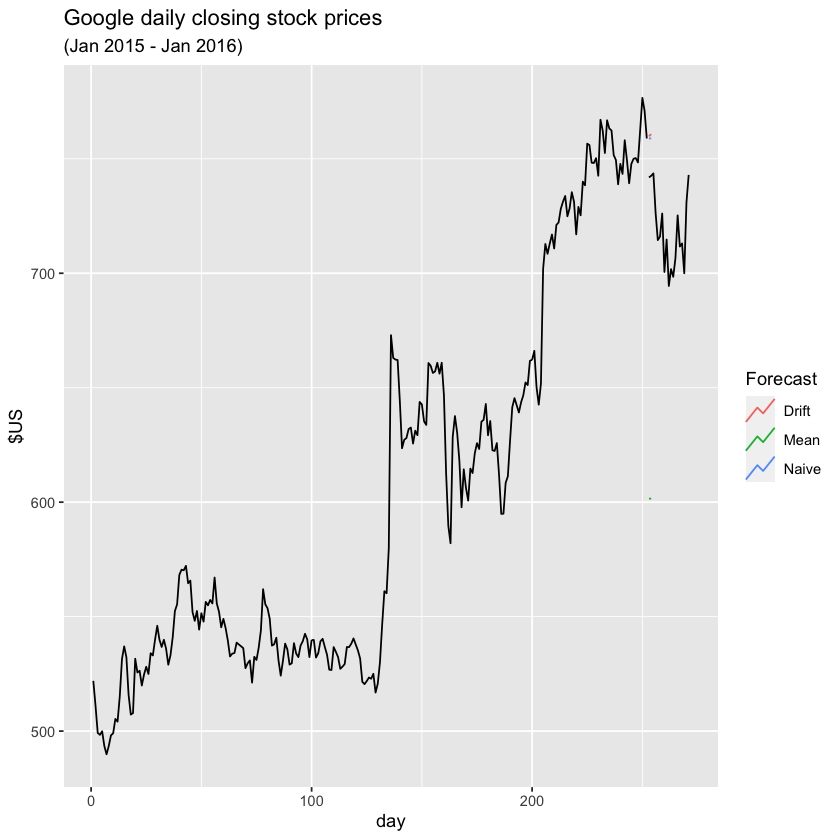

In [76]:
google_fc %>%
  autoplot(google_2015, level = NULL) +
  autolayer(google_jan_2016, Close, colour = "black") +
  labs(y = "$US",
       title = "Google daily closing stock prices",
       subtitle = "(Jan 2015 - Jan 2016)") +
  guides(colour = guide_legend(title = "Forecast"))

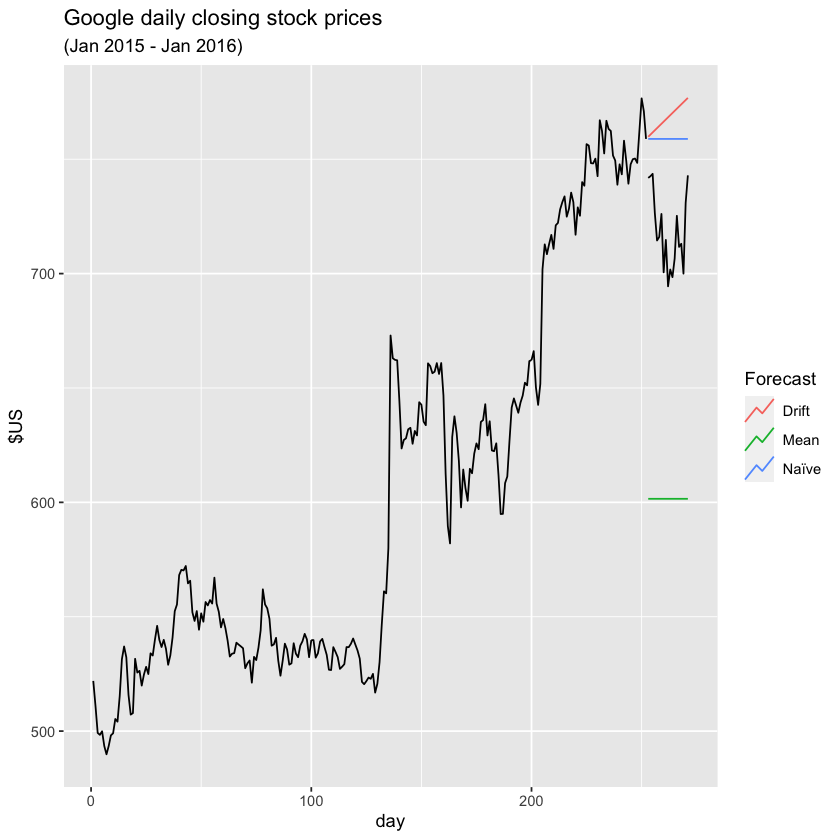

In [77]:
# Re-index based on trading days
google_stock <- gafa_stock %>%
  filter(Symbol == "GOOG", year(Date) >= 2015) %>%
  mutate(day = row_number()) %>%
  update_tsibble(index = day, regular = TRUE)
# Filter the year of interest
google_2015 <- google_stock %>% filter(year(Date) == 2015)
# Fit the models
google_fit <- google_2015 %>%
  model(
    Mean = MEAN(Close),
    `Naïve` = NAIVE(Close),
    Drift = NAIVE(Close ~ drift())
  )
# Produce forecasts for the trading days in January 2016
google_jan_2016 <- google_stock %>%
  filter(yearmonth(Date) == yearmonth("2016 Jan"))
google_fc <- google_fit %>%
  forecast(new_data = google_jan_2016)
# Plot the forecasts
google_fc %>%
  autoplot(google_2015, level = NULL) +
  autolayer(google_jan_2016, Close, colour = "black") +
  labs(y = "$US",
       title = "Google daily closing stock prices",
       subtitle = "(Jan 2015 - Jan 2016)") +
  guides(colour = guide_legend(title = "Forecast"))

- Any forecasting methods we develop will be compared to these simple methods to ensure that the new method is better than these simple alternatives. If not, the new method is not worth considering

# 3. Fitted values and residuals

In [78]:
train <- aus_production %>%
  filter_index("1992 Q1" ~ "2006 Q4")
beer_fit <- train %>%
  model(
    Mean = MEAN(Beer),
  )

In [80]:
augment(beer_fit)[1:5,]

.model Quarter Beer .fitted .resid .innov
1 Mean   1992 Q1 443  436.45    6.55   6.55
2 Mean   1992 Q2 410  436.45  -26.45 -26.45
3 Mean   1992 Q3 420  436.45  -16.45 -16.45
4 Mean   1992 Q4 532  436.45   95.55  95.55
5 Mean   1993 Q1 433  436.45   -3.45  -3.45

- If patterns are observable in the innovation residuals, the model can probably be improved

# 4. Residuals diagnostic

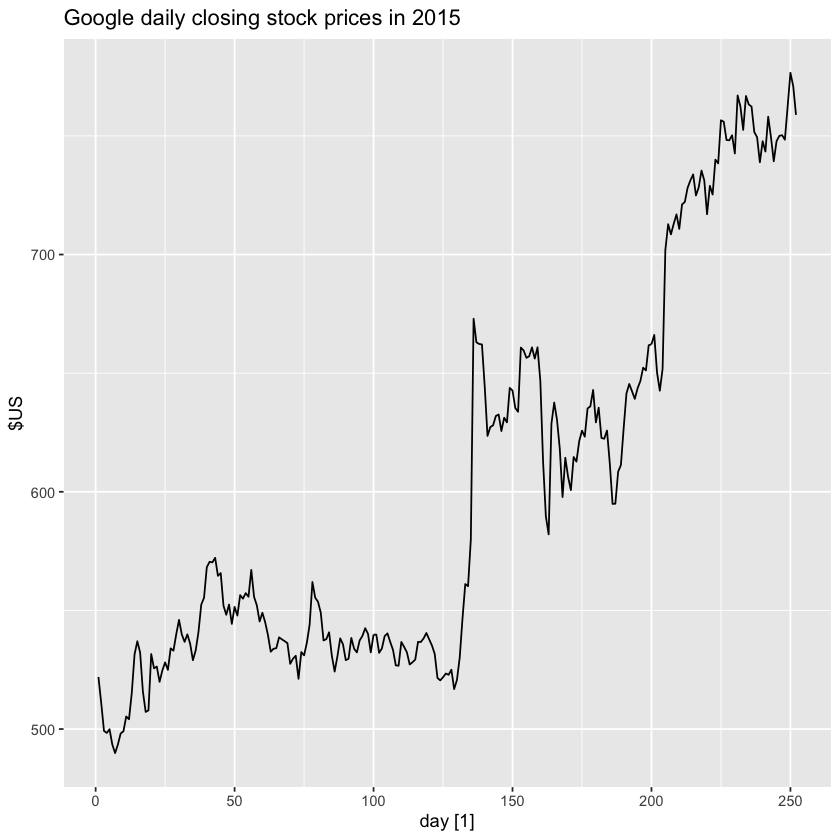

In [82]:
autoplot(google_2015,Close)+
  labs(y = "$US",
       title = "Google daily closing stock prices in 2015")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


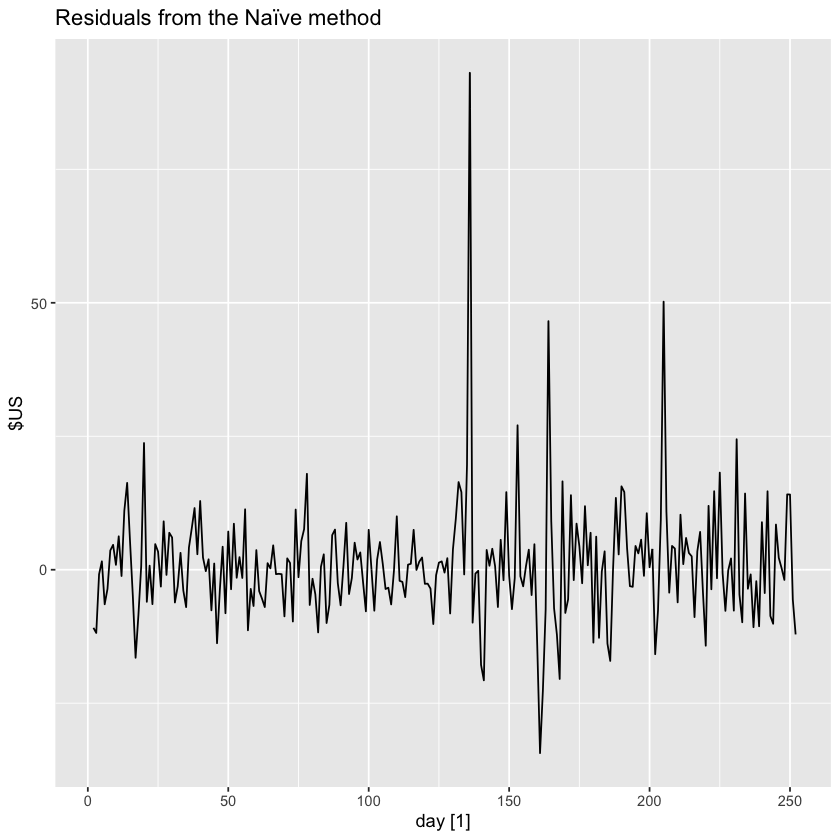

In [91]:
aug<-google_2015 %>%
 model (
  NAIVE(Close) 
  ) %>%
 augment()

autoplot(aug, .innov)+ # the point is very important
  labs(y = "$US",
       title = "Residuals from the Naïve method")

# Residuals from forecasting the Google stock price using the Naïve method.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


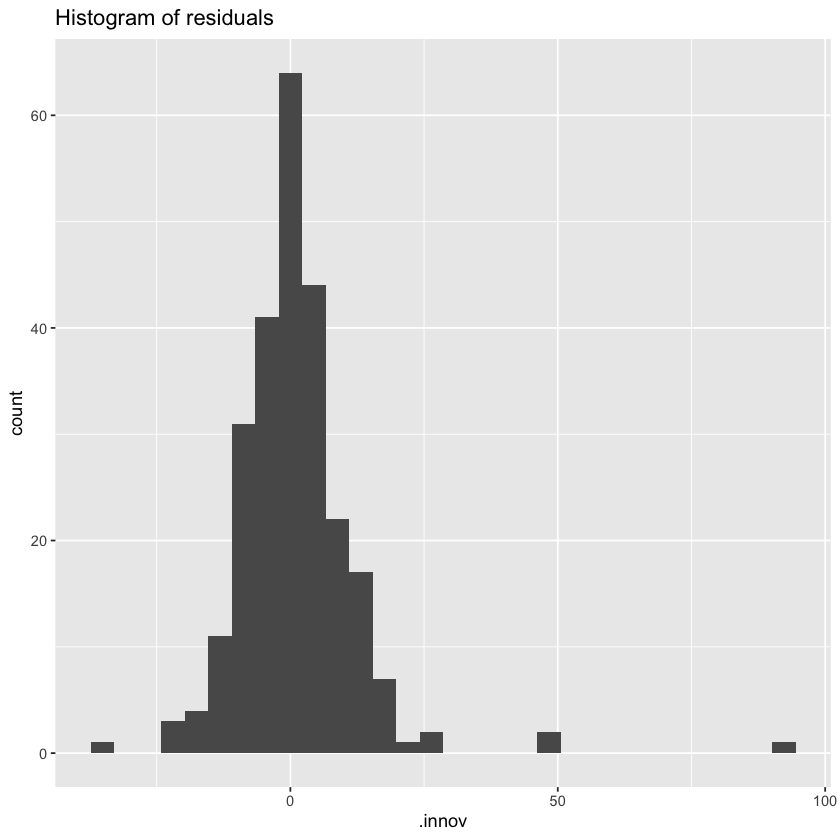

In [93]:
aug %>%
 ggplot(aes(x=.innov))+
 geom_histogram()+
 labs(title= "Histogram of residuals")
# Histogram of the residuals from the Naïve method applied to the Google stock price.
# The right tail seems a little too long for a normal distribution.

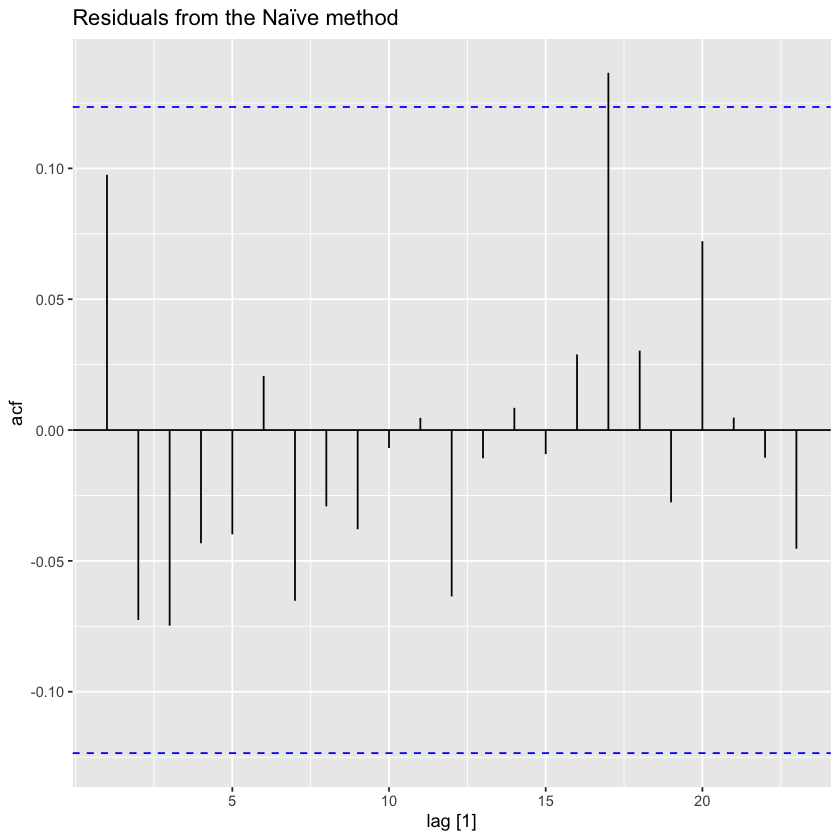

In [94]:
aug %>%
 ACF(.innov) %>%
 autoplot()+
  labs(title = "Residuals from the Naïve method")

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


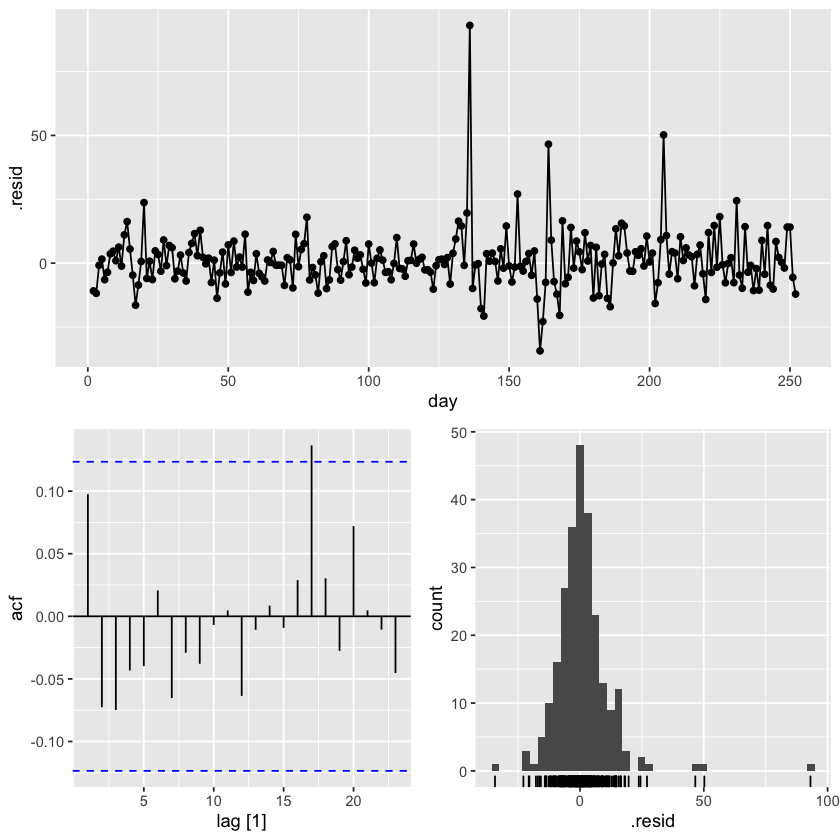

In [95]:
google_2015 %>%
 model(
  NAIVE(Close)
 ) %>%
gg_tsresiduals()

we test whether the first  %l
  autocorrelations are significantly different from what would be expected from a white noise process. A test for a group of autocorrelations is called a portmanteau test:
- Box-Pierce test
- Ljung-Box test

In [96]:
aug %>% features(.innov, box_pierce, lag = 10, dof = 0)

Symbol .model       bp_stat  bp_pvalue
1 GOOG   NAIVE(Close) 7.744517 0.6537761

In [97]:
aug %>% features(.innov, ljung_box, lag = 10, dof = 0)

Symbol .model       lb_stat  lb_pvalue
1 GOOG   NAIVE(Close) 7.914143 0.6372231

For both   Q (box_pierce) and   Q^* (Ljung-Box)
 , the results are not significant (i.e., the  
p
 -values are relatively large). Thus, we can conclude that the residuals are not distinguishable from a white noise series.

In [98]:
fit <- google_2015 %>% model(RW(Close ~ drift()))

In [99]:
tidy(fit)

Symbol .model              term estimate  std.error statistic p.value  
1 GOOG   RW(Close ~ drift()) b    0.9439931 0.7051685 1.338677  0.1818918

In [100]:
augment(fit) %>% features(.innov, ljung_box,lag=10, dof=1)

Symbol .model              lb_stat  lb_pvalue
1 GOOG   RW(Close ~ drift()) 7.914143 0.5428212

# 5. Distributional forecasts and prediction intervals

- Forecast Distributions.
- Prediction Intervals.
- One-step predition intervals.
- Multi-step prediction intervals.

In [107]:
# Bechmark Methods:
google_2015 %>%
 model(
  NAIVE(Close)
 ) %>%
 forecast(h=10)
 

Symbol .model       day Close        .mean 
1  GOOG   NAIVE(Close) 253 N(759, 125)  758.88
2  GOOG   NAIVE(Close) 254 N(759, 250)  758.88
3  GOOG   NAIVE(Close) 255 N(759, 376)  758.88
4  GOOG   NAIVE(Close) 256 N(759, 501)  758.88
5  GOOG   NAIVE(Close) 257 N(759, 626)  758.88
6  GOOG   NAIVE(Close) 258 N(759, 751)  758.88
7  GOOG   NAIVE(Close) 259 N(759, 876)  758.88
8  GOOG   NAIVE(Close) 260 N(759, 1002) 758.88
9  GOOG   NAIVE(Close) 261 N(759, 1127) 758.88
10 GOOG   NAIVE(Close) 262 N(759, 1252) 758.88

- The Close column contains the forecast distribution, while 
- the .mean column contains the point forecast. 
- The point forecast is the mean (or average) of the forecast distribution.

In [110]:
google_2015 %>%
 model(
  NAIVE(Close)
 ) %>%
 forecast(h=10) %>%
 hilo()

Symbol .model       day Close        .mean  80%                   
1  GOOG   NAIVE(Close) 253 N(759, 125)  758.88 [744.5400, 773.2200]80
2  GOOG   NAIVE(Close) 254 N(759, 250)  758.88 [738.6001, 779.1599]80
3  GOOG   NAIVE(Close) 255 N(759, 376)  758.88 [734.0423, 783.7177]80
4  GOOG   NAIVE(Close) 256 N(759, 501)  758.88 [730.1999, 787.5601]80
5  GOOG   NAIVE(Close) 257 N(759, 626)  758.88 [726.8147, 790.9453]80
6  GOOG   NAIVE(Close) 258 N(759, 751)  758.88 [723.7543, 794.0058]80
7  GOOG   NAIVE(Close) 259 N(759, 876)  758.88 [720.9399, 796.8202]80
8  GOOG   NAIVE(Close) 260 N(759, 1002) 758.88 [718.3203, 799.4397]80
9  GOOG   NAIVE(Close) 261 N(759, 1127) 758.88 [715.8599, 801.9001]80
10 GOOG   NAIVE(Close) 262 N(759, 1252) 758.88 [713.5329, 804.2272]80
   95%                   
1  [736.9488, 780.8112]95
2  [727.8646, 789.8954]95
3  [720.8941, 796.8659]95
4  [715.0176, 802.7424]95
5  [709.8404, 807.9196]95
6  [705.1598, 812.6002]95
7  [700.8556, 816.9045]95
8  [696.8493, 820.9108]95
9  [693.0865, 824.6735]95
10 [689.5275, 828.2325]95

The hilo() function converts the forecast distributions into intervals.
By default, 80% and 95% prediction intervals are returned, although other options are possible via the level argument.

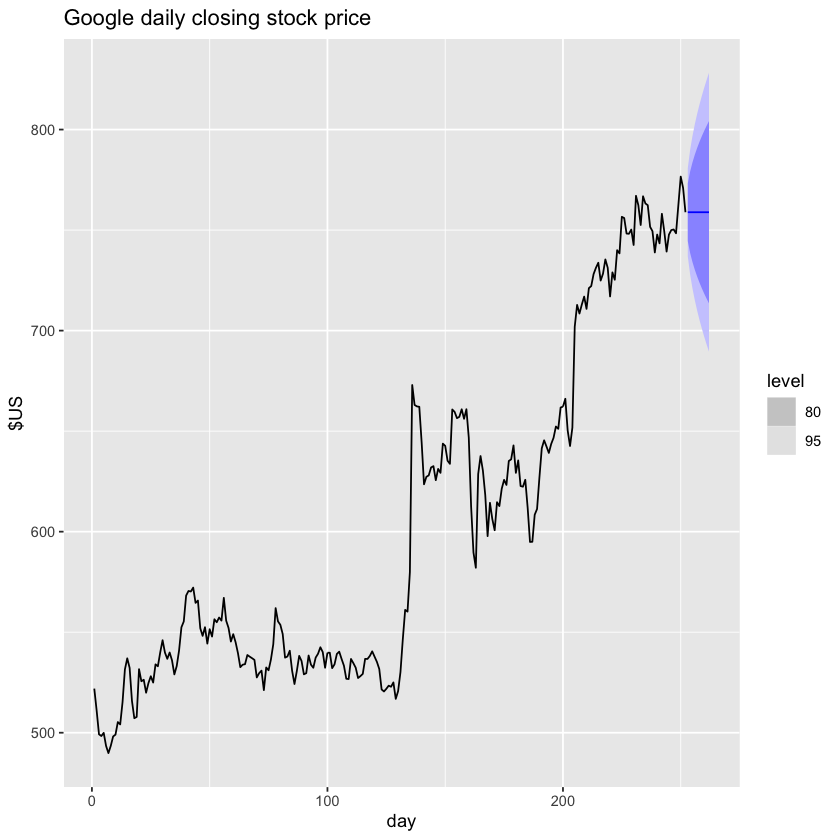

In [111]:
google_2015 %>%
 model(
  NAIVE(Close)
 ) %>%
 forecast(h=10) %>%
autoplot(google_2015)+
labs(title="Google daily closing stock price", y="$US" )


# Prediction intervals from bootstrapped residuals


When a normal distribution for the residuals is an unreasonable assumption: 
- one alternative is to use bootstrapping, which only assumes that the residuals are uncorrelated with constant variance
- https://otexts.com/fpp3/prediction-intervals.html

In [112]:
fit <- google_2015 %>%
 model(
 NAIVE(Close)
 )


In [113]:
sim <- fit %>% 
 generate(h=30, times=5, boostrap= TRUE)

 generate(h=30, times=5, boostrap= TRUE)
 
 Generate many possible futures given the estimation or fitted model where:
 - The forecast is for the next 30 trading days.
 - Generate five  possible sample paths (we controlled using times)
 - We applied Boostrap

In [114]:
sim

Symbol .model       day .rep .sim    
1   GOOG   NAIVE(Close) 253 1    772.3441
2   GOOG   NAIVE(Close) 254 1    787.2900
3   GOOG   NAIVE(Close) 255 1    792.2055
4   GOOG   NAIVE(Close) 256 1    775.5991
5   GOOG   NAIVE(Close) 257 1    780.9125
6   GOOG   NAIVE(Close) 258 1    784.0080
7   GOOG   NAIVE(Close) 259 1    783.5469
8   GOOG   NAIVE(Close) 260 1    786.9376
9   GOOG   NAIVE(Close) 261 1    784.2026
10  GOOG   NAIVE(Close) 262 1    778.7052
11  GOOG   NAIVE(Close) 263 1    786.8822
12  GOOG   NAIVE(Close) 264 1    788.8450
13  GOOG   NAIVE(Close) 265 1    794.5523
14  GOOG   NAIVE(Close) 266 1    805.5663
15  GOOG   NAIVE(Close) 267 1    805.6752
16  GOOG   NAIVE(Close) 268 1    791.8908
17  GOOG   NAIVE(Close) 269 1    776.4113
18  GOOG   NAIVE(Close) 270 1    776.8491
19  GOOG   NAIVE(Close) 271 1    780.5342
20  GOOG   NAIVE(Close) 272 1    800.3766
21  GOOG   NAIVE(Close) 273 1    809.9207
22  GOOG   NAIVE(Close) 274 1    812.1179
23  GOOG   NAIVE(Close) 275 1    816.3767
24  GOOG   NAIVE(Close) 276 1    822.9687
25  GOOG   NAIVE(Close) 277 1    810.3248
26  GOOG   NAIVE(Close) 278 1    813.1697
27  GOOG   NAIVE(Close) 279 1    806.8761
28  GOOG   NAIVE(Close) 280 1    797.7820
29  GOOG   NAIVE(Close) 281 1    788.9328
30  GOOG   NAIVE(Close) 282 1    784.8111
⋮   ⋮      ⋮            ⋮   ⋮    ⋮       
121 GOOG   NAIVE(Close) 253 5    768.6683
122 GOOG   NAIVE(Close) 254 5    767.9592
123 GOOG   NAIVE(Close) 255 5    780.9062
124 GOOG   NAIVE(Close) 256 5    776.8870
125 GOOG   NAIVE(Close) 257 5    769.9208
126 GOOG   NAIVE(Close) 258 5    756.1663
127 GOOG   NAIVE(Close) 259 5    753.9695
128 GOOG   NAIVE(Close) 260 5    748.0913
129 GOOG   NAIVE(Close) 261 5    749.4641
130 GOOG   NAIVE(Close) 262 5    737.8152
131 GOOG   NAIVE(Close) 263 5    726.3486
132 GOOG   NAIVE(Close) 264 5    730.6599
133 GOOG   NAIVE(Close) 265 5    736.6078
134 GOOG   NAIVE(Close) 266 5    737.0563
135 GOOG   NAIVE(Close) 267 5    730.1945
136 GOOG   NAIVE(Close) 268 5    724.7268
137 GOOG   NAIVE(Close) 269 5    729.9143
138 GOOG   NAIVE(Close) 270 5    746.6051
139 GOOG   NAIVE(Close) 271 5    749.1622
140 GOOG   NAIVE(Close) 272 5    747.6889
141 GOOG   NAIVE(Close) 273 5    735.1243
142 GOOG   NAIVE(Close) 274 5    742.5693
143 GOOG   NAIVE(Close) 275 5    727.8090
144 GOOG   NAIVE(Close) 276 5    720.3277
145 GOOG   NAIVE(Close) 277 5    747.5339
146 GOOG   NAIVE(Close) 278 5    735.2995
147 GOOG   NAIVE(Close) 279 5    740.5250
148 GOOG   NAIVE(Close) 280 5    746.5951
149 GOOG   NAIVE(Close) 281 5    743.3607
150 GOOG   NAIVE(Close) 282 5    748.7158

- The .rep variable provides a new key for the tsibble

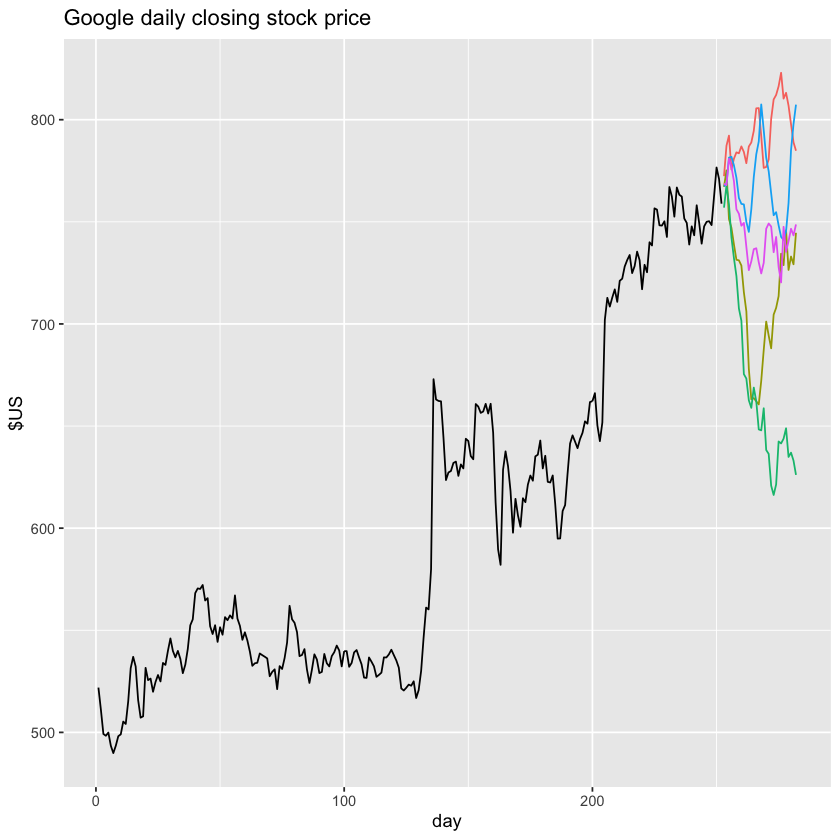

In [120]:
google_2015 %>%
 ggplot(aes(x=day))+      # axis x
 geom_line(aes(y=Close))+ # axis y
 geom_line(aes(y=.sim,colour=as.factor(.rep)), # axis y for the simulations.
           data=sim)+
labs(title="Google daily closing stock price", y="$US" ) +
  guides(col = FALSE)

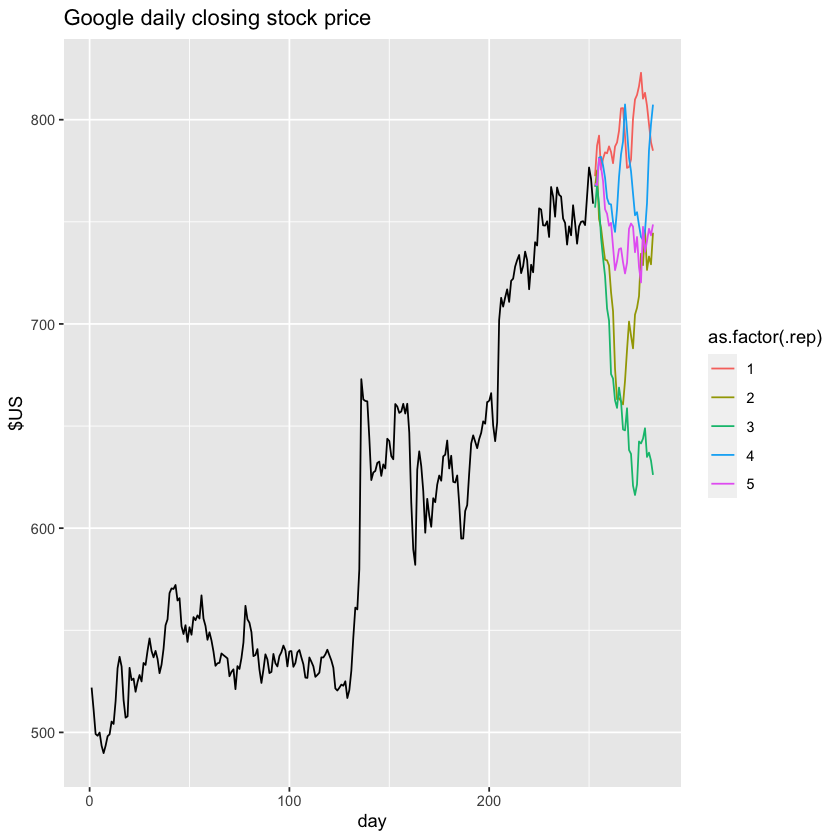

In [121]:
google_2015 %>%
 ggplot(aes(x=day))+      # axis x
 geom_line(aes(y=Close))+ # axis y
 geom_line(aes(y=.sim,colour=as.factor(.rep)), # axis y for the simulations.
           data=sim)+
labs(title="Google daily closing stock price", y="$US" ) 

Five simulated future sample paths of the Google closing stock price based on a Naïve method with bootstrapped residuals.

Also,

we can compute prediction intervals by calculating percentiles of the future sample paths for each forecast horizon. The result is called a bootstrapped prediction interval.

Instead of: sim <- fit %>% 
 generate(h=30, times=5, boostrap= TRUE)
 
do: fc <- fit %>%
 forecast(h=30, bootstrap=TRUE)

In [123]:
fc <- fit %>%
 forecast(h=30, bootstrap=TRUE)

In [124]:
fc

Symbol .model       day Close        .mean   
1  GOOG   NAIVE(Close) 253 sample[5000] 759.0630
2  GOOG   NAIVE(Close) 254 sample[5000] 758.8121
3  GOOG   NAIVE(Close) 255 sample[5000] 758.8586
4  GOOG   NAIVE(Close) 256 sample[5000] 758.9143
5  GOOG   NAIVE(Close) 257 sample[5000] 758.9275
6  GOOG   NAIVE(Close) 258 sample[5000] 758.6817
7  GOOG   NAIVE(Close) 259 sample[5000] 758.5775
8  GOOG   NAIVE(Close) 260 sample[5000] 758.4897
9  GOOG   NAIVE(Close) 261 sample[5000] 758.2623
10 GOOG   NAIVE(Close) 262 sample[5000] 758.1471
11 GOOG   NAIVE(Close) 263 sample[5000] 758.0158
12 GOOG   NAIVE(Close) 264 sample[5000] 757.7612
13 GOOG   NAIVE(Close) 265 sample[5000] 757.7183
14 GOOG   NAIVE(Close) 266 sample[5000] 757.7515
15 GOOG   NAIVE(Close) 267 sample[5000] 757.7772
16 GOOG   NAIVE(Close) 268 sample[5000] 757.6527
17 GOOG   NAIVE(Close) 269 sample[5000] 757.4619
18 GOOG   NAIVE(Close) 270 sample[5000] 757.5108
19 GOOG   NAIVE(Close) 271 sample[5000] 757.2608
20 GOOG   NAIVE(Close) 272 sample[5000] 757.0870
21 GOOG   NAIVE(Close) 273 sample[5000] 757.2244
22 GOOG   NAIVE(Close) 274 sample[5000] 757.1437
23 GOOG   NAIVE(Close) 275 sample[5000] 757.1531
24 GOOG   NAIVE(Close) 276 sample[5000] 757.0382
25 GOOG   NAIVE(Close) 277 sample[5000] 756.9901
26 GOOG   NAIVE(Close) 278 sample[5000] 757.0124
27 GOOG   NAIVE(Close) 279 sample[5000] 756.9590
28 GOOG   NAIVE(Close) 280 sample[5000] 757.1218
29 GOOG   NAIVE(Close) 281 sample[5000] 757.0741
30 GOOG   NAIVE(Close) 282 sample[5000] 757.1797

Now, we have simulation with 5000 sample paths

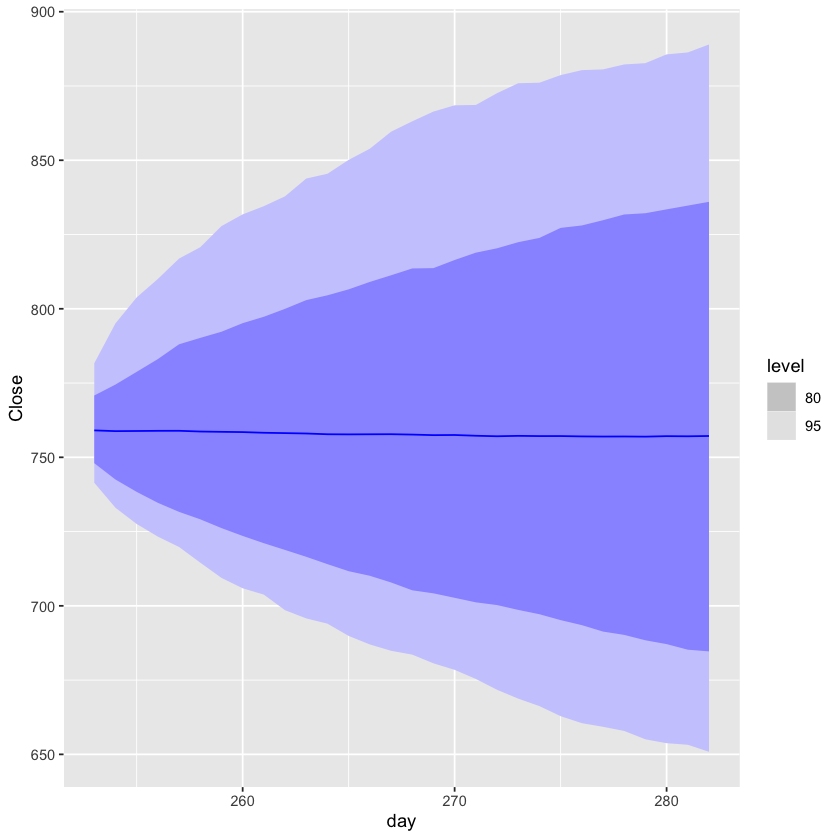

In [125]:
autoplot(fc)

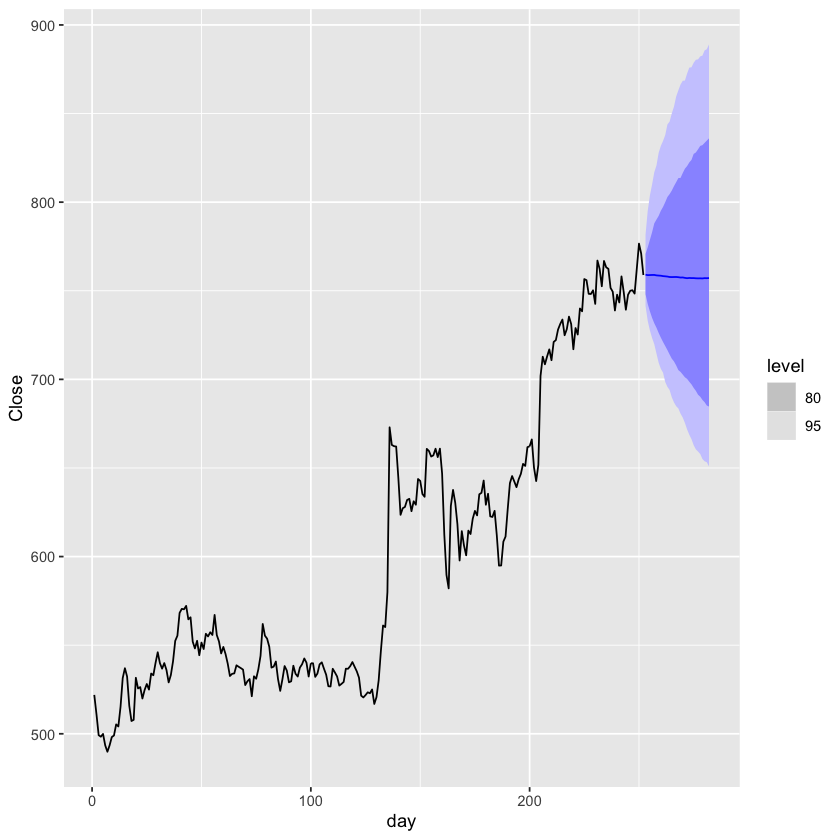

In [126]:
autoplot(fc, google_2015)

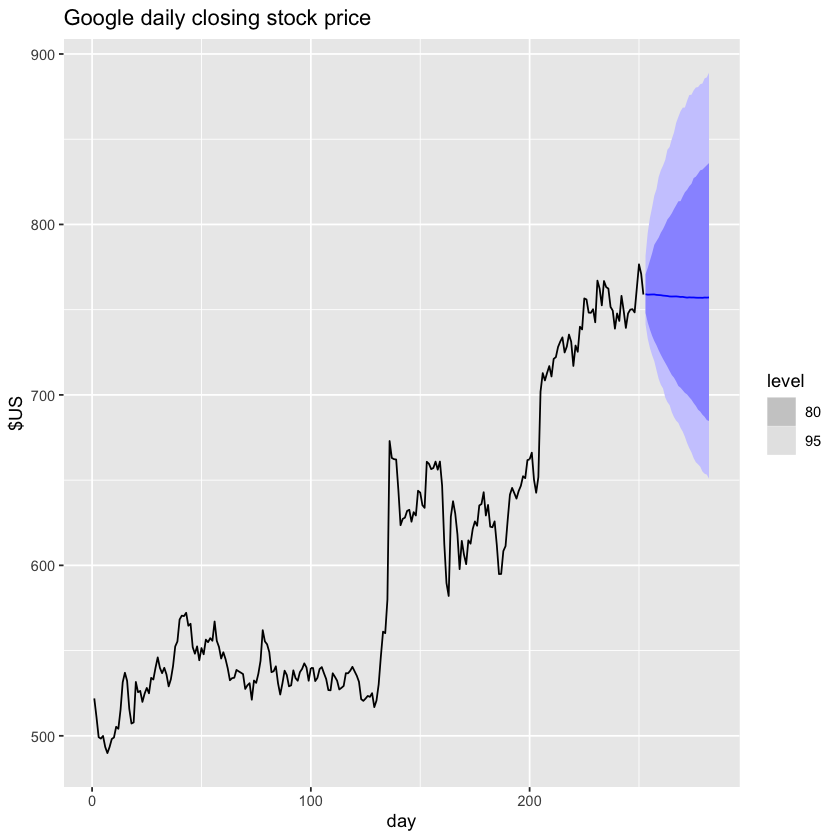

In [127]:
autoplot(fc, google_2015) +
  labs(title="Google daily closing stock price", y="$US" )

Forecasts of the Google closing stock price based on a Naïve method with bootstrapped residuals.



In [128]:
eggs

ERROR: Error in eval(expr, envir, enclos): object 'eggs' not found


# 6. Prediction intervals with transformations


https://otexts.com/fpp3/ftransformations.html

Warning message:
“Ignoring unknown aesthetics: linetype”


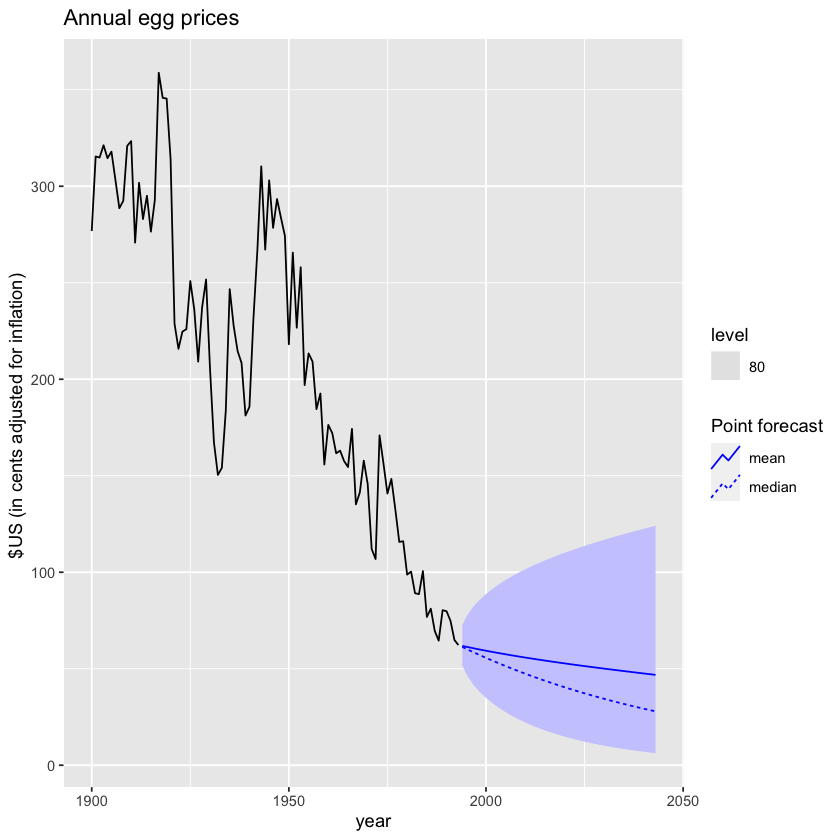

In [129]:
prices %>%
  filter(!is.na(eggs)) %>%
  model(RW(log(eggs) ~ drift())) %>%
  forecast(h = 50) %>%
  autoplot(prices %>% filter(!is.na(eggs)),
    level = 80, point_forecast = lst(mean, median)
  ) +
  labs(title = "Annual egg prices",
       y = "$US (in cents adjusted for inflation) ")


# 7. Forecasting with decomposition

In [131]:
# as we did in the past:

us_retail_employment <- us_employment %>%
  filter(year(Month) >= 1990, Title == "Retail Trade")
dcmp <- us_retail_employment %>%
  model(STL(Employed ~ trend(window = 7), robust = TRUE)) %>%
  components()

STL decomposition method (STL is a versatile and robust method for decomposing time series).

Remmember:

- STL has several advantages over classical decomposition, and the SEATS and X-11 methods
- On the other hand, STL has some disadvantages. In particular, it does not handle trading day or calendar variation automatically, and it only provides facilities for additive decompositions

In [132]:
dcmp

Series_ID     .model                                           Month   
1   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Jan
2   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Feb
3   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Mar
4   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Apr
5   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 May
6   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Jun
7   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Jul
8   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Aug
9   CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Sep
10  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Oct
11  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Nov
12  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1990 Dec
13  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Jan
14  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Feb
15  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Mar
16  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Apr
17  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 May
18  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Jun
19  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Jul
20  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Aug
21  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Sep
22  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Oct
23  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Nov
24  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1991 Dec
25  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1992 Jan
26  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1992 Feb
27  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1992 Mar
28  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1992 Apr
29  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1992 May
30  CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 1992 Jun
⋮   ⋮             ⋮                                                ⋮       
328 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Apr
329 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 May
330 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Jun
331 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Jul
332 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Aug
333 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Sep
334 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Oct
335 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Nov
336 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2017 Dec
337 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Jan
338 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Feb
339 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Mar
340 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Apr
341 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 May
342 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Jun
343 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Jul
344 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Aug
345 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Sep
346 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Oct
347 CEU4200000001 STL(Employed ~ trend(window = 7), robust = TRUE) 2018 Nov
348 CEU4200000001 STL(Employed ~ trend(window = 7), 

In [133]:
dcmp <- us_retail_employment %>%
  model(STL(Employed ~ trend(window = 7), robust = TRUE)) %>%
  components() %>% 
  select(-.model)

In [135]:
dcmp[1:5,]

Series_ID     Month    Employed trend    season_year remainder season_adjust
1 CEU4200000001 1990 Jan 13255.8  13246.19  -74.86373  84.473250 13330.66     
2 CEU4200000001 1990 Feb 12966.3  13238.66 -273.65179   1.296541 13239.95     
3 CEU4200000001 1990 Mar 12938.2  13231.34 -291.56498  -1.571768 13229.76     
4 CEU4200000001 1990 Apr 13012.3  13224.00 -210.46558  -1.234104 13222.77     
5 CEU4200000001 1990 May 13108.3  13216.25 -111.57989   3.628471 13219.88

I did the decomposition, then I use the season adjusted series to do the forecast.

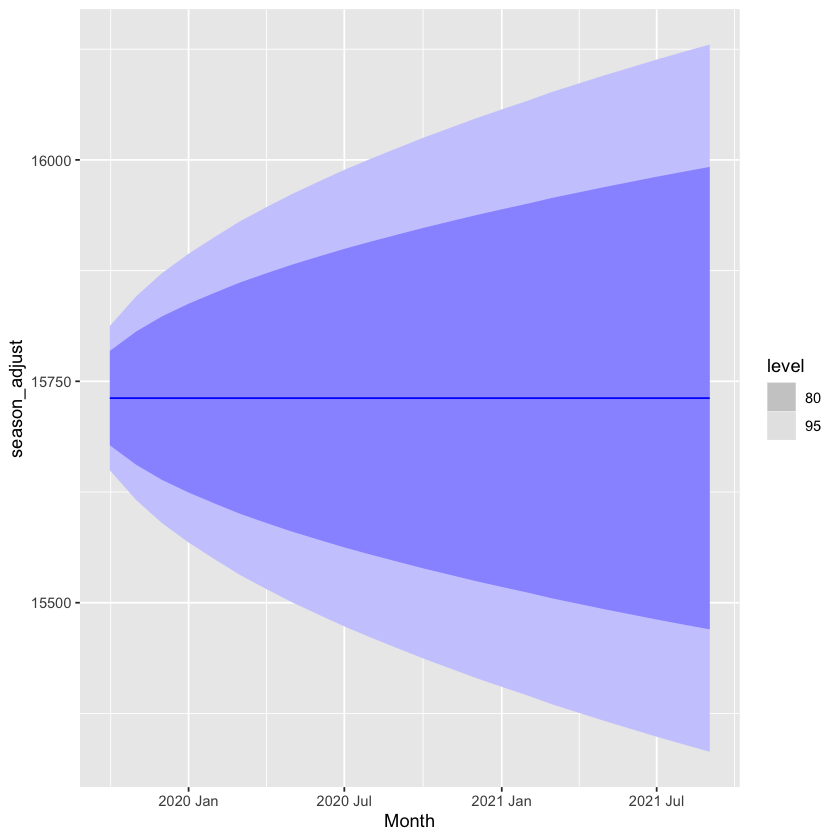

In [136]:
dcmp %>%
  model(
      NAIVE(season_adjust)
   ) %>%

  forecast() %>%

  autoplot() # if i dont put the variable, only do a graph of the forecast.

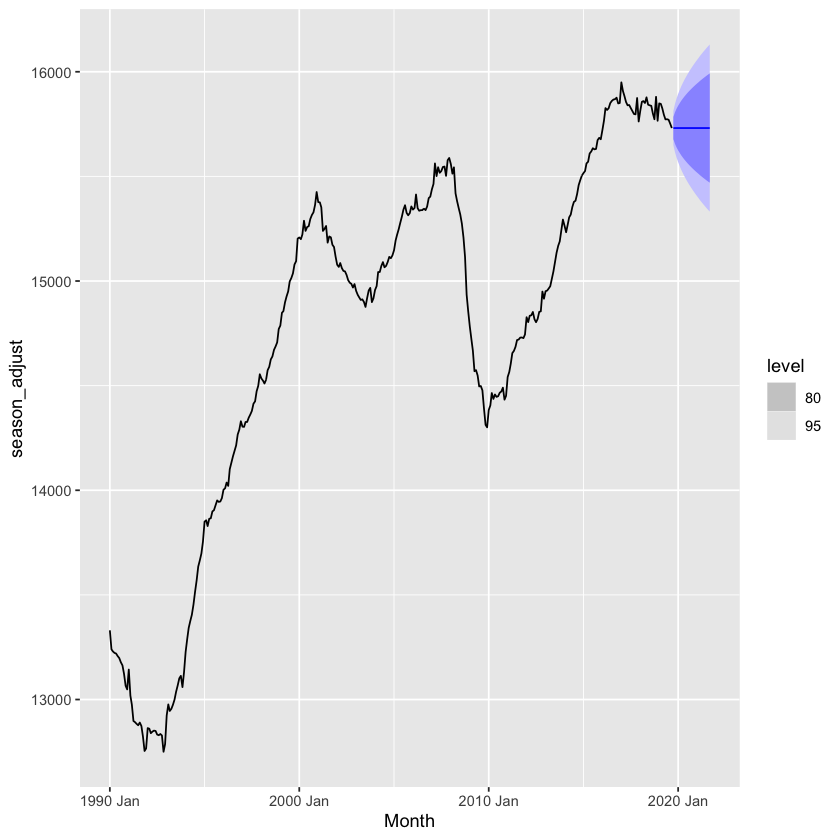

In [138]:
dcmp %>%
  model(
      NAIVE(season_adjust)
       ) %>%

  forecast() %>%

  autoplot(dcmp) # if i put the variable, do a graph of the variable with the  the forecast.

Naïve forecasts of the seasonally adjusted US retail employment data.

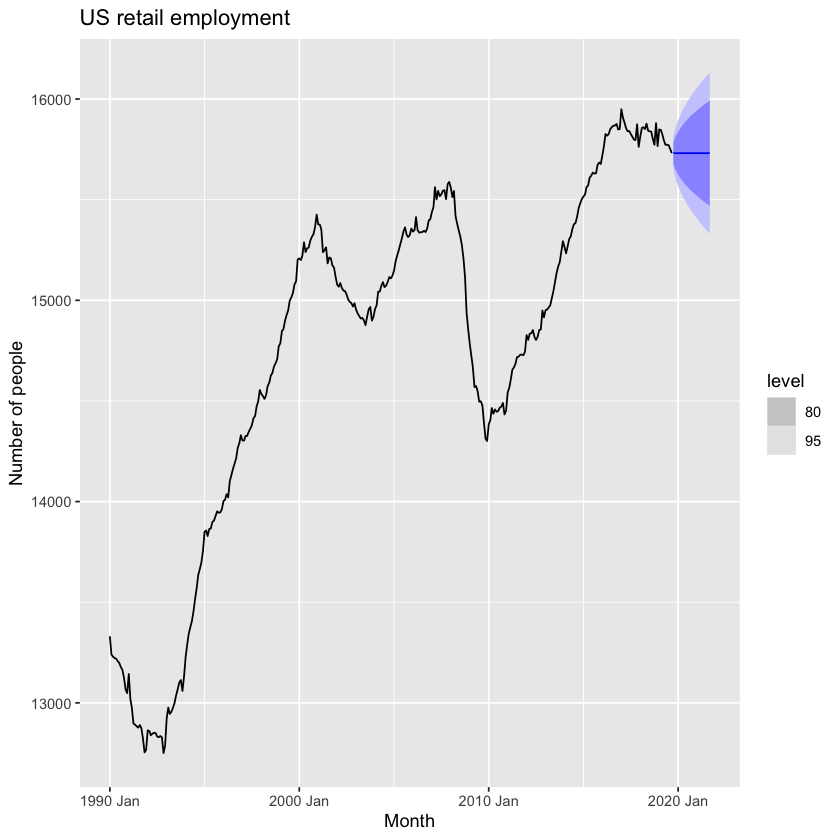

In [139]:
dcmp %>%
  model(NAIVE(season_adjust)) %>%
  forecast() %>%
  autoplot(dcmp) +
  labs(y = "Number of people",
       title = "US retail employment")


Note that:
- decomposition_model() function allows you to compute forecasts via any additive decomposition, using other model functions to forecast each of the decomposition’s components

In [140]:
dcmp    <- us_retail_employment %>%
  model(
      STL(Employed ~ trend(window = 7), robust = TRUE)
       ) %>%
  components() %>%
  select(-.model)

In [152]:
fit_dcmp <- us_retail_employment %>%
  model(
   stlf = decomposition_model(
                              STL(Employed ~ trend(window = 7), robust = TRUE),
                               NAIVE(season_adjust)
                              )
        )

In [142]:
dcmp[1:5,]

Series_ID     Month    Employed trend    season_year remainder season_adjust
1 CEU4200000001 1990 Jan 13255.8  13246.19  -74.86373  84.473250 13330.66     
2 CEU4200000001 1990 Feb 12966.3  13238.66 -273.65179   1.296541 13239.95     
3 CEU4200000001 1990 Mar 12938.2  13231.34 -291.56498  -1.571768 13229.76     
4 CEU4200000001 1990 Apr 13012.3  13224.00 -210.46558  -1.234104 13222.77     
5 CEU4200000001 1990 May 13108.3  13216.25 -111.57989   3.628471 13219.88

In [154]:
fit_dcmp

Series_ID     stlf                     
1 CEU4200000001 <STL decomposition model>

In [157]:
dcmp %>%
  model(NAIVE(season_adjust)) %>%
  forecast() 

Series_ID     .model               Month    season_adjust   .mean
1  CEU4200000001 NAIVE(season_adjust) 2019 Oct N(15731, 1729)  15731
2  CEU4200000001 NAIVE(season_adjust) 2019 Nov N(15731, 3459)  15731
3  CEU4200000001 NAIVE(season_adjust) 2019 Dec N(15731, 5188)  15731
4  CEU4200000001 NAIVE(season_adjust) 2020 Jan N(15731, 6918)  15731
5  CEU4200000001 NAIVE(season_adjust) 2020 Feb N(15731, 8647)  15731
6  CEU4200000001 NAIVE(season_adjust) 2020 Mar N(15731, 10377) 15731
7  CEU4200000001 NAIVE(season_adjust) 2020 Apr N(15731, 12106) 15731
8  CEU4200000001 NAIVE(season_adjust) 2020 May N(15731, 13835) 15731
9  CEU4200000001 NAIVE(season_adjust) 2020 Jun N(15731, 15565) 15731
10 CEU4200000001 NAIVE(season_adjust) 2020 Jul N(15731, 17294) 15731
11 CEU4200000001 NAIVE(season_adjust) 2020 Aug N(15731, 19024) 15731
12 CEU4200000001 NAIVE(season_adjust) 2020 Sep N(15731, 20753) 15731
13 CEU4200000001 NAIVE(season_adjust) 2020 Oct N(15731, 22483) 15731
14 CEU4200000001 NAIVE(season_adjust) 2020 Nov N(15731, 24212) 15731
15 CEU4200000001 NAIVE(season_adjust) 2020 Dec N(15731, 25942) 15731
16 CEU4200000001 NAIVE(season_adjust) 2021 Jan N(15731, 27671) 15731
17 CEU4200000001 NAIVE(season_adjust) 2021 Feb N(15731, 29400) 15731
18 CEU4200000001 NAIVE(season_adjust) 2021 Mar N(15731, 31130) 15731
19 CEU4200000001 NAIVE(season_adjust) 2021 Apr N(15731, 32859) 15731
20 CEU4200000001 NAIVE(season_adjust) 2021 May N(15731, 34589) 15731
21 CEU4200000001 NAIVE(season_adjust) 2021 Jun N(15731, 36318) 15731
22 CEU4200000001 NAIVE(season_adjust) 2021 Jul N(15731, 38048) 15731
23 CEU4200000001 NAIVE(season_adjust) 2021 Aug N(15731, 39777) 15731
24 CEU4200000001 NAIVE(season_adjust) 2021 Sep N(15731, 41506) 15731

In [156]:
fit_dcmp %>%
  forecast() 

Series_ID     .model Month    Employed        .mean   
1  CEU4200000001 stlf   2019 Oct N(15755, 1728)  15754.55
2  CEU4200000001 stlf   2019 Nov N(16142, 3455)  16142.28
3  CEU4200000001 stlf   2019 Dec N(16274, 5182)  16274.30
4  CEU4200000001 stlf   2020 Jan N(15636, 6910)  15635.63
5  CEU4200000001 stlf   2020 Feb N(15452, 8638)  15451.97
6  CEU4200000001 stlf   2020 Mar N(15482, 10366) 15482.10
7  CEU4200000001 stlf   2020 Apr N(15561, 12094) 15561.45
8  CEU4200000001 stlf   2020 May N(15650, 13822) 15650.15
9  CEU4200000001 stlf   2020 Jun N(15733, 15551) 15733.31
10 CEU4200000001 stlf   2020 Jul N(15746, 17279) 15746.27
11 CEU4200000001 stlf   2020 Aug N(15729, 19008) 15728.80
12 CEU4200000001 stlf   2020 Sep N(15611, 20736) 15611.30
13 CEU4200000001 stlf   2020 Oct N(15755, 22460) 15754.55
14 CEU4200000001 stlf   2020 Nov N(16142, 24188) 16142.28
15 CEU4200000001 stlf   2020 Dec N(16274, 25917) 16274.30
16 CEU4200000001 stlf   2021 Jan N(15636, 27645) 15635.63
17 CEU4200000001 stlf   2021 Feb N(15452, 29373) 15451.97
18 CEU4200000001 stlf   2021 Mar N(15482, 31102) 15482.10
19 CEU4200000001 stlf   2021 Apr N(15561, 32830) 15561.45
20 CEU4200000001 stlf   2021 May N(15650, 34559) 15650.15
21 CEU4200000001 stlf   2021 Jun N(15733, 36287) 15733.31
22 CEU4200000001 stlf   2021 Jul N(15746, 38016) 15746.27
23 CEU4200000001 stlf   2021 Aug N(15729, 39744) 15728.80
24 CEU4200000001 stlf   2021 Sep N(15611, 41473) 15611.30

Note the diferences:
- Case 1: given the seasonadjusted series comes from STL, I do a NAIVE FORECAST.
- Case 2: I allow the model  compute forecasts via any additive decomposition, using other model functions to forecast each of the decomposition’s components. Seasonal components of the model will be forecast automatically using SNAIVE() if a different model isn’t specified. The function will also do the reseasonalising for you, ensuring that the resulting forecasts of the original data are obtained. 

 Forecasts of the total US retail employment data based on a Naïve forecast of the seasonally adjusted data and a Seasonal naïve forecast of the seasonal component, after an STL decomposition of the data
 

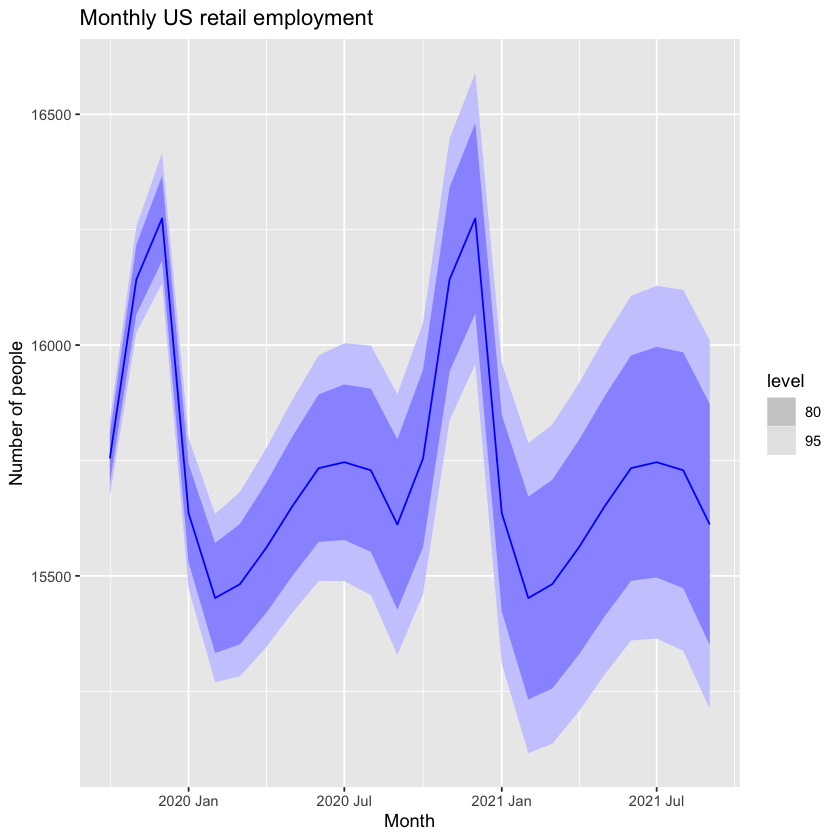

In [161]:
fit_dcmp <- us_retail_employment %>%
  model(stlf = decomposition_model(
    STL(Employed ~ trend(window = 7), robust = TRUE),
    NAIVE(season_adjust)
  ))
fit_dcmp %>%
  forecast() %>%
  autoplot()+
  labs(y = "Number of people",
       title = "Monthly US retail employment")

The prediction intervals shown in this graph are constructed in the same way as the point forecasts. That is, the upper and lower limits of the prediction intervals on the seasonally adjusted data are “reseasonalised” by adding in the forecasts of the seasonal component.

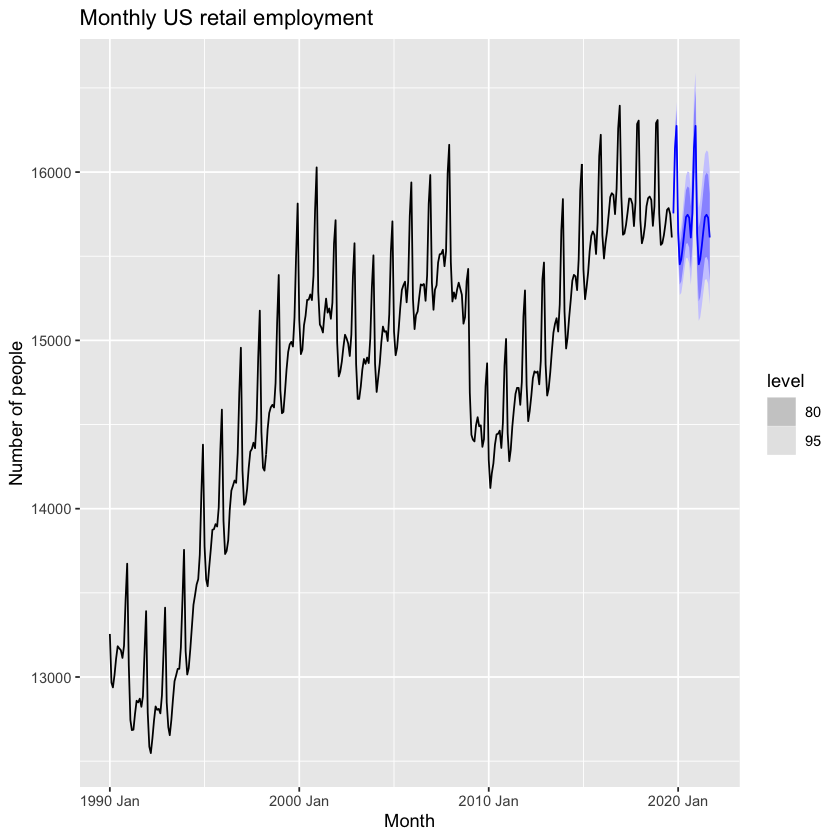

In [162]:
fit_dcmp <- us_retail_employment %>%
  model(stlf = decomposition_model(
    STL(Employed ~ trend(window = 7), robust = TRUE),
    NAIVE(season_adjust)   # Naïve forecast of the seasonally adjusted data 
  ))
fit_dcmp %>%
  forecast() %>%   # Seasonal naïve forecast of the seasonal component
  autoplot(us_retail_employment)+
  labs(y = "Number of people",
       title = "Monthly US retail employment")

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”


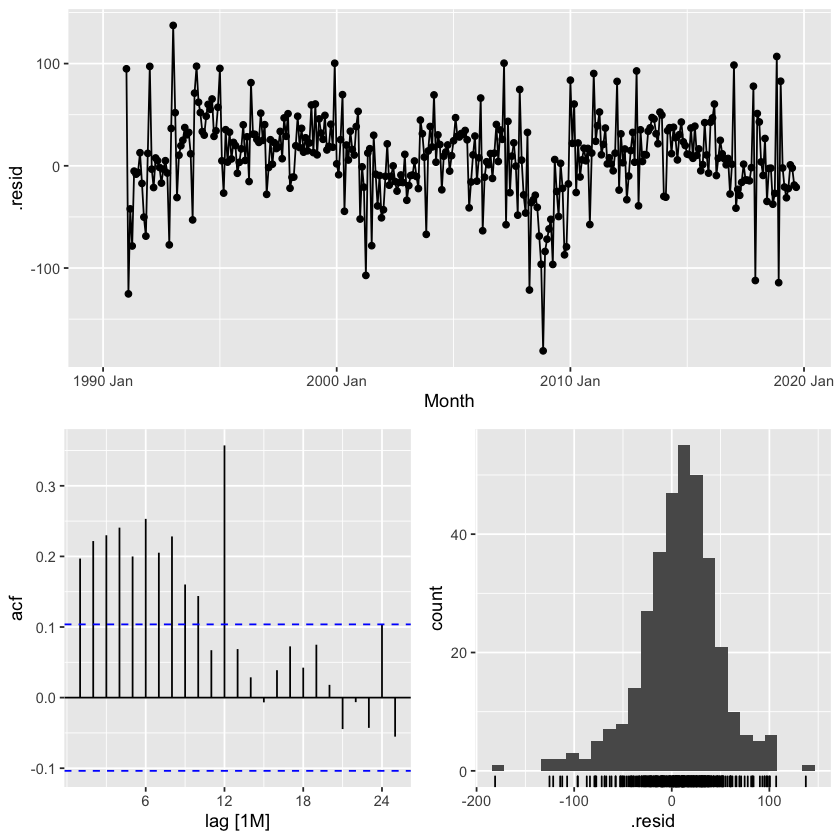

In [163]:
fit_dcmp %>% gg_tsresiduals()


The ACF of the residuals display significant autocorrelations. These are due to the Naïve method not capturing the changing trend in the seasonally adjusted series.

# 8. Evaluating point forecast accuracy


In [164]:
aus_production %>% filter(year(Quarter) >= 1995)

Quarter Beer Tobacco Bricks Cement Electricity Gas
1  1995 Q1 426  4714    430    1626   41768       131
2  1995 Q2 408  3939    457    1703   43686       167
3  1995 Q3 416  6137    417    1733   46022       181
4  1995 Q4 520  4739    370    1545   42800       145
5  1996 Q1 409  4275    310    1526   43661       133
6  1996 Q2 398  5239    358    1593   44707       162
7  1996 Q3 398  6293    379    1706   46326       184
8  1996 Q4 507  5575    369    1699   43346       146
9  1997 Q1 432  4802    330    1511   43938       135
10 1997 Q2 398  5523    390    1785   45828       171
11 1997 Q3 406  5708    416    1826   48448       183
12 1997 Q4 526  4821    383    1830   46096       151
13 1998 Q1 428  4919    339    1719   46198       141
14 1998 Q2 397  5809    394    1861   47237       174
15 1998 Q3 403  5904    412    1956   49041       191
16 1998 Q4 517  4555    420    2067   46192       157
17 1999 Q1 435  5198    376    1737   48089       145
18 1999 Q2 383  5388    401    1944   48227       182
19 1999 Q3 424  5142    430    2005   49784       198
20 1999 Q4 521  5517    417    2027   47588       165
21 2000 Q1 421  5169    416    1835   49320       164
22 2000 Q2 402  4860    447    2070   50670       199
23 2000 Q3 414  5185    421    1898   52623       213
24 2000 Q4 500  4763    379    1652   49350       173
25 2001 Q1 451  4217    304    1554   51658       177
26 2001 Q2 380  4959    337    1717   51103       205
27 2001 Q3 416  5196    385    1679   52226       218
28 2001 Q4 492  4522    381    1836   50778       185
29 2002 Q1 428  3843    345    1729   50639       166
30 2002 Q2 408  4806    405    1992   51486       204
⋮  ⋮       ⋮    ⋮       ⋮      ⋮      ⋮           ⋮  
33 2003 Q1 435  4362    387    1831   51415       172
34 2003 Q2 380  5210    415    1892   51379       204
35 2003 Q3 421  5258    440    2227   54808       232
36 2003 Q4 490  4526    413    2090   52453       188
37 2004 Q1 435  3974    409    1963   54561       173
38 2004 Q2 390  5027    423    2180   54644       215
39 2004 Q3 412    NA    428    2307   55915       227
40 2004 Q4 454    NA    397    2157   52850       190
41 2005 Q1 416    NA    355    1980   55035       170
42 2005 Q2 403    NA    435    2481   55117       206
43 2005 Q3 408    NA     NA    2340   56043       221
44 2005 Q4 482    NA     NA    2265   54992       180
45 2006 Q1 438    NA     NA    2027   57112       171
46 2006 Q2 386    NA     NA    2278   57157       224
47 2006 Q3 405    NA     NA    2427   58400       233
48 2006 Q4 491    NA     NA    2451   56249       192
49 2007 Q1 427    NA     NA    2140   56244       187
50 2007 Q2 383    NA     NA    2362   55036       234
51 2007 Q3 394    NA     NA    2536   59806       245
52 2007 Q4 473    NA     NA    2562   56411       205
53 2008 Q1 420    NA     NA    2183   59118       194
54 2008 Q2 390    NA     NA    2558   56660       229
55 2008 Q3 410    NA     NA    2612   64067       249
56 2008 Q4 488    NA     NA    2373   59045       203
57 2009 Q1 415    NA     NA    1963   58368       196
58 2009 Q2 398    NA     NA    2160   57471       238
59 2009 Q3 419    NA     NA    2325   58394       252
60 2009 Q4 488    NA     NA    2273   57336       210
61 2010 Q1 414    NA     NA    1904   58309       205
62 2010 Q2 374    NA     NA    2401   58041       236

In [165]:
aus_production %>%
  slice(n()-19:0)

Quarter Beer Tobacco Bricks Cement Electricity Gas
1  2005 Q3 408  NA      NA     2340   56043       221
2  2005 Q4 482  NA      NA     2265   54992       180
3  2006 Q1 438  NA      NA     2027   57112       171
4  2006 Q2 386  NA      NA     2278   57157       224
5  2006 Q3 405  NA      NA     2427   58400       233
6  2006 Q4 491  NA      NA     2451   56249       192
7  2007 Q1 427  NA      NA     2140   56244       187
8  2007 Q2 383  NA      NA     2362   55036       234
9  2007 Q3 394  NA      NA     2536   59806       245
10 2007 Q4 473  NA      NA     2562   56411       205
11 2008 Q1 420  NA      NA     2183   59118       194
12 2008 Q2 390  NA      NA     2558   56660       229
13 2008 Q3 410  NA      NA     2612   64067       249
14 2008 Q4 488  NA      NA     2373   59045       203
15 2009 Q1 415  NA      NA     1963   58368       196
16 2009 Q2 398  NA      NA     2160   57471       238
17 2009 Q3 419  NA      NA     2325   58394       252
18 2009 Q4 488  NA      NA     2273   57336       210
19 2010 Q1 414  NA      NA     1904   58309       205
20 2010 Q2 374  NA      NA     2401   58041       236

In [166]:
aus_retail %>%
  group_by(State, Industry) %>%
  slice(1:12)

State                       
1    Australian Capital Territory
2    Australian Capital Territory
3    Australian Capital Territory
4    Australian Capital Territory
5    Australian Capital Territory
6    Australian Capital Territory
7    Australian Capital Territory
8    Australian Capital Territory
9    Australian Capital Territory
10   Australian Capital Territory
11   Australian Capital Territory
12   Australian Capital Territory
13   Australian Capital Territory
14   Australian Capital Territory
15   Australian Capital Territory
16   Australian Capital Territory
17   Australian Capital Territory
18   Australian Capital Territory
19   Australian Capital Territory
20   Australian Capital Territory
21   Australian Capital Territory
22   Australian Capital Territory
23   Australian Capital Territory
24   Australian Capital Territory
25   Australian Capital Territory
26   Australian Capital Territory
27   Australian Capital Territory
28   Australian Capital Territory
29   Australian Capital Territory
30   Australian Capital Territory
⋮    ⋮                           
1795 Western Australia           
1796 Western Australia           
1797 Western Australia           
1798 Western Australia           
1799 Western Australia           
1800 Western Australia           
1801 Western Australia           
1802 Western Australia           
1803 Western Australia           
1804 Western Australia           
1805 Western Australia           
1806 Western Australia           
1807 Western Australia           
1808 Western Australia           
1809 Western Australia           
1810 Western Australia           
1811 Western Australia           
1812 Western Australia           
1813 Western Australia           
1814 Western Australia           
1815 Western Australia           
1816 Western Australia           
1817 Western Australia           
1818 Western Australia           
1819 Western Australia           
1820 Western Australia           
1821 Western Australia           
1822 Western Australia           
1823 Western Australia           
1824 Western Australia           
     Industry                                              Series ID Month   
1    Cafes, restaurants and catering services              A3349849A 1982 Apr
2    Cafes, restaurants and catering services              A3349849A 1982 May
3    Cafes, restaurants and catering services              A3349849A 1982 Jun
4    Cafes, restaurants and catering services              A3349849A 1982 Jul
5    Cafes, restaurants and catering services              A3349849A 1982 Aug
6    Cafes, restaurants and catering services              A3349849A 1982 Sep
7    Cafes, restaurants and catering services              A3349849A 1982 Oct
8    Cafes, restaurants and catering services              A3349849A 1982 Nov
9    Cafes, restaurants and catering services              A3349849A 1982 Dec
10   Cafes, restaurants and catering services              A3349849A 1983 Jan
11   Cafes, restaurants and catering services              A3349849A 1983 Feb
12   Cafes, restaurants and catering services              A3349849A 1983 Mar
13   Cafes, restaurants and takeaway food services         A3349606J 1982 Apr
14   Cafes, restaurants and takeaway food services         A3349606J 1982 May
15   Cafes, restaurants and takeaway food services         A3349606J 1982 Jun
16   Cafes, restaurants and takeaway food services         A3349606J 1982 Jul
17   Cafes, restaurants and takeaway food services         A3349606J 1982 Aug
18   Cafes, restaurants and takeaway food services         A3349606J 1982 Sep
19   Cafes, restaurants and takeaway food services         A3349606J 1982 Oct
20   Cafes, restaurants and takeaway food services         A3349606J 1982 Nov
21   Cafes, restaurants and takeaway food services         A3349606J 1982 Dec
22   Cafes, restaurants and takeaway food services         A3349606J 1983 Jan
23   Cafes, restaurants and takeaway food services         A3349606J 1983 Feb
24   Cafes, restaurants a

In [169]:
aus_production[1:5,]

Quarter Beer Tobacco Bricks Cement Electricity Gas
1 1956 Q1 284  5225    189    465    3923        5  
2 1956 Q2 213  5178    204    532    4436        6  
3 1956 Q3 227  5297    208    561    4806        7  
4 1956 Q4 308  5681    197    570    4418        6  
5 1957 Q1 262  5577    187    529    4339        5

## EXAMPLE 1: seasonal example

- STEP 1: Get the data

In [167]:
recent_production <- aus_production %>%
  filter(year(Quarter) >= 1992)

In [168]:
recent_production[1:5,]

Quarter Beer Tobacco Bricks Cement Electricity Gas
1 1992 Q1 443  5777    383    1289   38332       117
2 1992 Q2 410  5853    404    1501   39774       151
3 1992 Q3 420  6416    446    1539   42246       175
4 1992 Q4 532  5825    420    1568   38498       129
5 1993 Q1 433  5724    394    1450   39460       116

- STEP 2: Separate the TRAINING DATA

In [171]:
beer_train <- recent_production %>%
  filter(year(Quarter) <= 2007)

In [179]:
beer_train

Quarter Beer Tobacco Bricks Cement Electricity Gas
1  1992 Q1 443  5777    383    1289   38332       117
2  1992 Q2 410  5853    404    1501   39774       151
3  1992 Q3 420  6416    446    1539   42246       175
4  1992 Q4 532  5825    420    1568   38498       129
5  1993 Q1 433  5724    394    1450   39460       116
6  1993 Q2 421  6036    462    1668   41356       149
7  1993 Q3 410  6570    475    1648   42949       163
8  1993 Q4 512  5675    443    1863   40974       138
9  1994 Q1 449  5311    421    1468   40162       127
10 1994 Q2 381  5717    475    1755   41199       159
11 1994 Q3 423  7000    497    1962   44095       184
12 1994 Q4 531  6085    476    1833   41745       147
13 1995 Q1 426  4714    430    1626   41768       131
14 1995 Q2 408  3939    457    1703   43686       167
15 1995 Q3 416  6137    417    1733   46022       181
16 1995 Q4 520  4739    370    1545   42800       145
17 1996 Q1 409  4275    310    1526   43661       133
18 1996 Q2 398  5239    358    1593   44707       162
19 1996 Q3 398  6293    379    1706   46326       184
20 1996 Q4 507  5575    369    1699   43346       146
21 1997 Q1 432  4802    330    1511   43938       135
22 1997 Q2 398  5523    390    1785   45828       171
23 1997 Q3 406  5708    416    1826   48448       183
24 1997 Q4 526  4821    383    1830   46096       151
25 1998 Q1 428  4919    339    1719   46198       141
26 1998 Q2 397  5809    394    1861   47237       174
27 1998 Q3 403  5904    412    1956   49041       191
28 1998 Q4 517  4555    420    2067   46192       157
29 1999 Q1 435  5198    376    1737   48089       145
30 1999 Q2 383  5388    401    1944   48227       182
⋮  ⋮       ⋮    ⋮       ⋮      ⋮      ⋮           ⋮  
35 2000 Q3 414  5185    421    1898   52623       213
36 2000 Q4 500  4763    379    1652   49350       173
37 2001 Q1 451  4217    304    1554   51658       177
38 2001 Q2 380  4959    337    1717   51103       205
39 2001 Q3 416  5196    385    1679   52226       218
40 2001 Q4 492  4522    381    1836   50778       185
41 2002 Q1 428  3843    345    1729   50639       166
42 2002 Q2 408  4806    405    1992   51486       204
43 2002 Q3 406  5280    417    2030   53299       228
44 2002 Q4 506  4709    420    1978   51646       186
45 2003 Q1 435  4362    387    1831   51415       172
46 2003 Q2 380  5210    415    1892   51379       204
47 2003 Q3 421  5258    440    2227   54808       232
48 2003 Q4 490  4526    413    2090   52453       188
49 2004 Q1 435  3974    409    1963   54561       173
50 2004 Q2 390  5027    423    2180   54644       215
51 2004 Q3 412    NA    428    2307   55915       227
52 2004 Q4 454    NA    397    2157   52850       190
53 2005 Q1 416    NA    355    1980   55035       170
54 2005 Q2 403    NA    435    2481   55117       206
55 2005 Q3 408    NA     NA    2340   56043       221
56 2005 Q4 482    NA     NA    2265   54992       180
57 2006 Q1 438    NA     NA    2027   57112       171
58 2006 Q2 386    NA     NA    2278   57157       224
59 2006 Q3 405    NA     NA    2427   58400       233
60 2006 Q4 491    NA     NA    2451   56249       192
61 2007 Q1 427    NA     NA    2140   56244       187
62 2007 Q2 383    NA     NA    2362   55036       234
63 2007 Q3 394    NA     NA    2536   59806       245
64 2007 Q4 473    NA     NA    2562   56411       205

- STEP 3: Estimate the model with the TRAINING DATA
 - Given the beer_train, I will estimate 4 models: MEAN, NAIVE, SNAIVE, DRIFT
 - Note that we alredy do the specification of the model very simple.

In [173]:
beer_fit <- beer_train %>%
  model(
    Mean = MEAN(Beer),
    `Naïve` = NAIVE(Beer),
    `Seasonal naïve` = SNAIVE(Beer),
    Drift = RW(Beer ~ drift())
  )

- STEP 4: Forecast of the mdodel.

In [176]:
beer_fc <- beer_fit %>%
  forecast(h = 10) #  forecasts for the next 10 observations

In [177]:
beer_fc

.model         Quarter Beer          .mean   
1  Mean           2008 Q1 N(435, 1964)  435.3750
2  Mean           2008 Q2 N(435, 1964)  435.3750
3  Mean           2008 Q3 N(435, 1964)  435.3750
4  Mean           2008 Q4 N(435, 1964)  435.3750
5  Mean           2009 Q1 N(435, 1964)  435.3750
6  Mean           2009 Q2 N(435, 1964)  435.3750
7  Mean           2009 Q3 N(435, 1964)  435.3750
8  Mean           2009 Q4 N(435, 1964)  435.3750
9  Mean           2010 Q1 N(435, 1964)  435.3750
10 Mean           2010 Q2 N(435, 1964)  435.3750
11 Naïve          2008 Q1 N(473, 4266)  473.0000
12 Naïve          2008 Q2 N(473, 8532)  473.0000
13 Naïve          2008 Q3 N(473, 12798) 473.0000
14 Naïve          2008 Q4 N(473, 17064) 473.0000
15 Naïve          2009 Q1 N(473, 21330) 473.0000
16 Naïve          2009 Q2 N(473, 25596) 473.0000
17 Naïve          2009 Q3 N(473, 29862) 473.0000
18 Naïve          2009 Q4 N(473, 34129) 473.0000
19 Naïve          2010 Q1 N(473, 38395) 473.0000
20 Naïve          2010 Q2 N(473, 42661) 473.0000
21 Seasonal naïve 2008 Q1 N(427, 282)   427.0000
22 Seasonal naïve 2008 Q2 N(383, 282)   383.0000
23 Seasonal naïve 2008 Q3 N(394, 282)   394.0000
24 Seasonal naïve 2008 Q4 N(473, 282)   473.0000
25 Seasonal naïve 2009 Q1 N(427, 563)   427.0000
26 Seasonal naïve 2009 Q2 N(383, 563)   383.0000
27 Seasonal naïve 2009 Q3 N(394, 563)   394.0000
28 Seasonal naïve 2009 Q4 N(473, 563)   473.0000
29 Seasonal naïve 2010 Q1 N(427, 845)   427.0000
30 Seasonal naïve 2010 Q2 N(383, 845)   383.0000
31 Drift          2008 Q1 N(473, 4335)  473.4762
32 Drift          2008 Q2 N(474, 8807)  473.9524
33 Drift          2008 Q3 N(474, 13417) 474.4286
34 Drift          2008 Q4 N(475, 18164) 474.9048
35 Drift          2009 Q1 N(475, 23049) 475.3810
36 Drift          2009 Q2 N(476, 28072) 475.8571
37 Drift          2009 Q3 N(476, 33232) 476.3333
38 Drift          2009 Q4 N(477, 38530) 476.8095
39 Drift          2010 Q1 N(477, 43966) 477.2857
40 Drift          2010 Q2 N(478, 49539) 477.7619

Given the forecast, now I want to plot it:

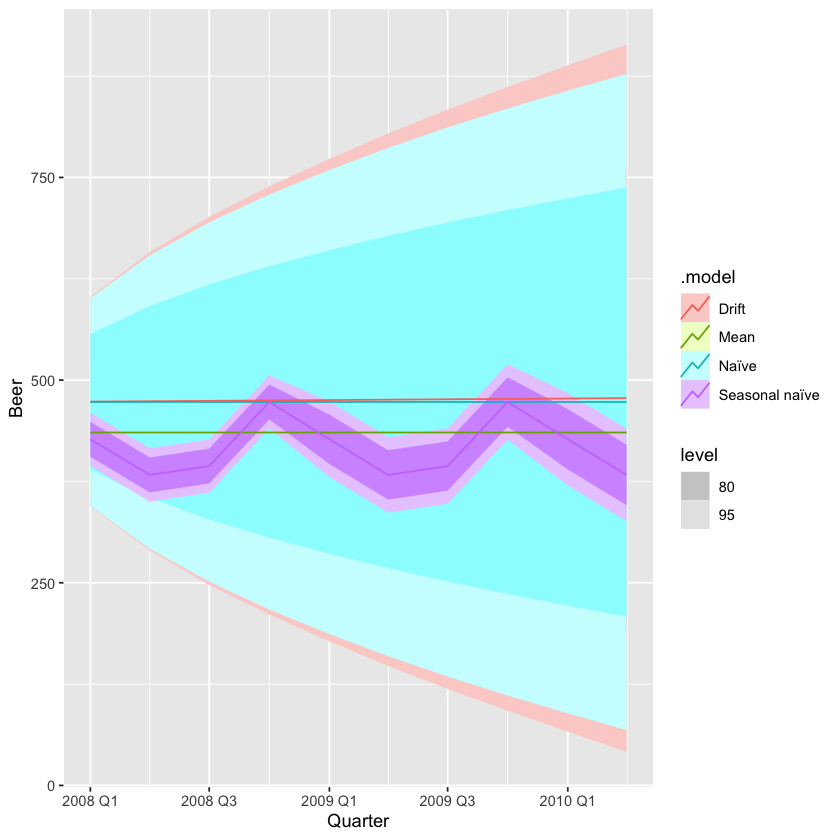

In [181]:
beer_fc %>%
  autoplot()

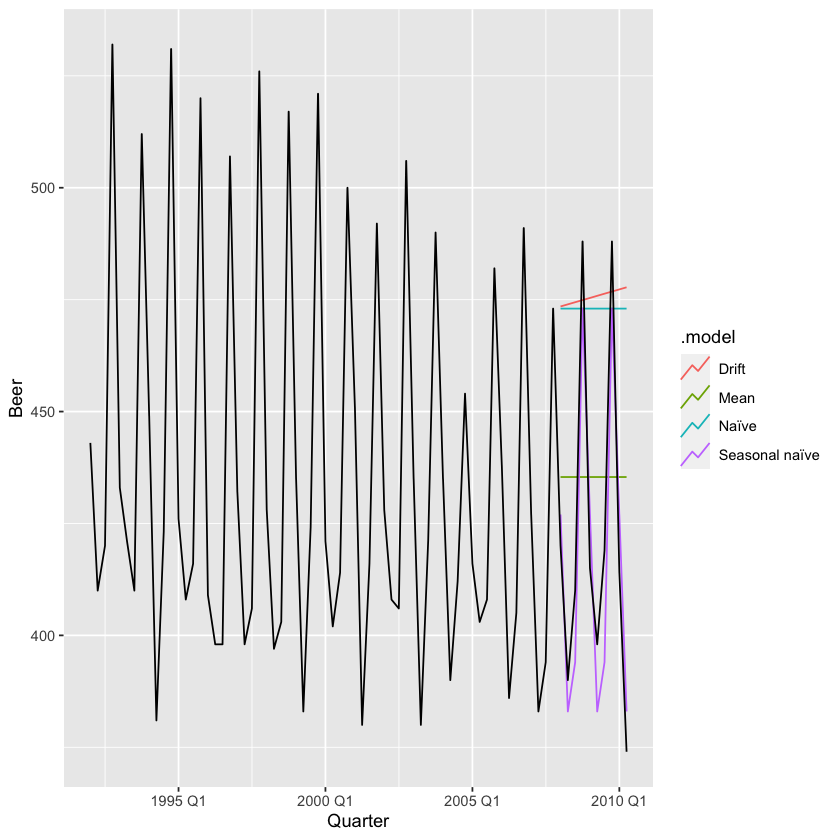

In [182]:
beer_fc %>%
  autoplot(
    aus_production %>% filter(year(Quarter) >= 1992),
    level = NULL
  )

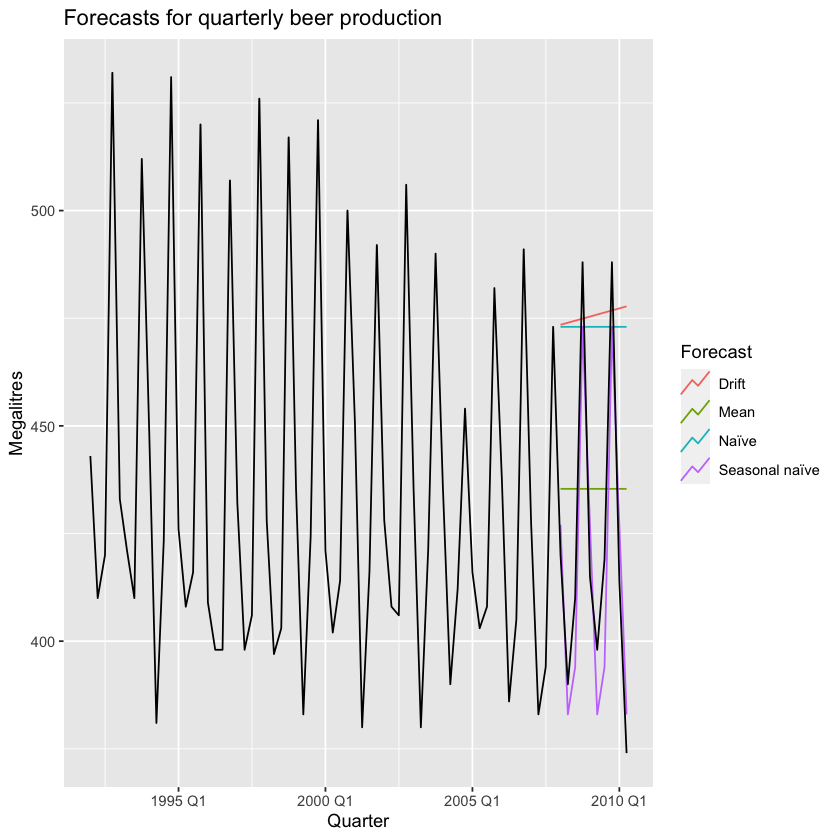

In [183]:
beer_fc %>%
  autoplot(
    aus_production %>% filter(year(Quarter) >= 1992),
    level = NULL
          )+
 labs(
    y = "Megalitres",
    title = "Forecasts for quarterly beer production"
  ) +
  guides(colour = guide_legend(title = "Forecast"))

- accuracy() function will automatically extract the relevant periods from the data (recent_production in this example) to match the forecasts when computing the various accuracy measures

In [186]:
accuracy(beer_fc, recent_production)

.model         .type ME        RMSE     MAE      MPE        MAPE     
1 Drift          Test  -54.01905 64.90129 58.87619 -13.582171 14.577487
2 Mean           Test  -13.77500 38.44724 34.82500  -3.969866  8.283390
3 Naïve          Test  -51.40000 62.69290 57.40000 -12.954916 14.184424
4 Seasonal naïve Test    5.20000 14.31084 13.40000   1.147554  3.168503
  MASE      RMSSE     ACF1       
1 4.1172161 3.8673308 -0.07410793
2 2.4353147 2.2909900 -0.06905715
3 4.0139860 3.7357375 -0.06905715
4 0.9370629 0.8527524  0.13184068

- It is obvious from the graph that the Seasonal naïve method is best for these data, although it can still be improved, as we will discover later. 
- Sometimes, different accuracy measures will lead to different results as to which forecast method is best. However, in this case, all of the results point to the Seasonal naïve method as the best of these three methods for this data set.

## EXAMPLE 2: non-seasonal example

ESTIMATION

In [187]:
google_fit <- google_2015 %>%
  model(
    Mean = MEAN(Close),
    `Naïve` = NAIVE(Close),
    Drift = RW(Close ~ drift())
  )

In [188]:
google_fit

Symbol Mean   Naïve   Drift        
1 GOOG   <MEAN> <NAIVE> <RW w/ drift>

FORECASTING

In [192]:
google_fc <- google_fit %>%
  forecast()

In [193]:
google_fc

Symbol .model day Close        .mean   
1 GOOG   Mean   253 N(602, 6766) 601.5505
2 GOOG   Mean   254 N(602, 6766) 601.5505
3 GOOG   Naïve  253 N(759, 125)  758.8800
4 GOOG   Naïve  254 N(759, 250)  758.8800
5 GOOG   Drift  253 N(760, 125)  759.8240
6 GOOG   Drift  254 N(761, 251)  760.7680

In [195]:
google_fc <- google_fit %>%
  forecast(google_jan_2016) # aqui le doy la variable que tiene la data historica

In [196]:
google_fc

Symbol .model day Close        .mean    Date       Open   High    Low    
1  GOOG   Mean   253 N(602, 6766) 601.5505 2016-01-04 743.00 744.060 731.258
2  GOOG   Mean   254 N(602, 6766) 601.5505 2016-01-05 746.45 752.000 738.640
3  GOOG   Mean   255 N(602, 6766) 601.5505 2016-01-06 730.00 747.180 728.920
4  GOOG   Mean   256 N(602, 6766) 601.5505 2016-01-07 730.31 738.500 719.060
5  GOOG   Mean   257 N(602, 6766) 601.5505 2016-01-08 731.45 733.230 713.000
6  GOOG   Mean   258 N(602, 6766) 601.5505 2016-01-11 716.61 718.855 703.540
7  GOOG   Mean   259 N(602, 6766) 601.5505 2016-01-12 721.68 728.750 717.317
8  GOOG   Mean   260 N(602, 6766) 601.5505 2016-01-13 730.85 734.740 698.610
9  GOOG   Mean   261 N(602, 6766) 601.5505 2016-01-14 705.38 721.925 689.100
10 GOOG   Mean   262 N(602, 6766) 601.5505 2016-01-15 692.29 706.740 685.370
11 GOOG   Mean   263 N(602, 6766) 601.5505 2016-01-19 703.30 709.980 693.410
12 GOOG   Mean   264 N(602, 6766) 601.5505 2016-01-20 688.61 706.850 673.260
13 GOOG   Mean   265 N(602, 6766) 601.5505 2016-01-21 702.18 719.190 694.460
14 GOOG   Mean   266 N(602, 6766) 601.5505 2016-01-22 723.60 728.130 720.121
15 GOOG   Mean   267 N(602, 6766) 601.5505 2016-01-25 723.58 729.680 710.010
16 GOOG   Mean   268 N(602, 6766) 601.5505 2016-01-26 713.85 718.280 706.480
17 GOOG   Mean   269 N(602, 6766) 601.5505 2016-01-27 713.67 718.235 694.390
18 GOOG   Mean   270 N(602, 6766) 601.5505 2016-01-28 722.22 733.690 712.350
19 GOOG   Mean   271 N(602, 6766) 601.5505 2016-01-29 731.53 744.990 726.800
20 GOOG   Naïve  253 N(759, 125)  758.8800 2016-01-04 743.00 744.060 731.258
21 GOOG   Naïve  254 N(759, 250)  758.8800 2016-01-05 746.45 752.000 738.640
22 GOOG   Naïve  255 N(759, 376)  758.8800 2016-01-06 730.00 747.180 728.920
23 GOOG   Naïve  256 N(759, 501)  758.8800 2016-01-07 730.31 738.500 719.060
24 GOOG   Naïve  257 N(759, 626)  758.8800 2016-01-08 731.45 733.230 713.000
25 GOOG   Naïve  258 N(759, 751)  758.8800 2016-01-11 716.61 718.855 703.540
26 GOOG   Naïve  259 N(759, 876)  758.8800 2016-01-12 721.68 728.750 717.317
27 GOOG   Naïve  260 N(759, 1002) 758.8800 2016-01-13 730.85 734.740 698.610
28 GOOG   Naïve  261 N(759, 1127) 758.8800 2016-01-14 705.38 721.925 689.100
29 GOOG   Naïve  262 N(759, 1252) 758.8800 2016-01-15 692.29 706.740 685.370
30 GOOG   Naïve  263 N(759, 1377) 758.8800 2016-01-19 703.30 709.980 693.410
31 GOOG   Naïve  264 N(759, 1502) 758.8800 2016-01-20 688.61 706.850 673.260
32 GOOG   Naïve  265 N(759, 1628) 758.8800 2016-01-21 702.18 719.190 694.460
33 GOOG   Naïve  266 N(759, 1753) 758.8800 2016-01-22 723.60 728.130 720.121
34 GOOG   Naïve  267 N(759, 1878) 758.8800 2016-01-25 723.58 729.680 710.010
35 GOOG   Naïve  268 N(759, 2003) 758.8800 2016-01-26 713.85 718.280 706.480
36 GOOG   Naïve  269 N(759, 2129) 758.8800 2016-01-27 713.67 718.235 694.390
37 GOOG   Naïve  270 N(759, 2254) 758.8800 2016-01-28 722.22 733.690 712.350
38 GOOG   Naïve  271 N(759, 2379) 758.8800 2016-01-29 731.53 744.990 726.800
39 GOOG   Drift  253 N(760, 125)  759.8240 2016-01-04 743.00 744.060 731.258
40 GOOG   Drift  254 N(761, 251)  760.7680 2016-01-05 746.45 752.000 738.640
41 GOOG   Drift  255 N(762, 377)  761.7120 2016-01-06 730.00 747.180 728.920
42 GOOG   Drift  256 N(763, 505)  762.6560 2016-01-07 730.31 738.500 719.060
43 GOOG   Drift  257 N(764, 634)  763.6000 2016-01-08 731.45 733.230 713.000
44 GOOG   Drift  258 N(765, 764)  764.5440 2016-01-11 716.61 718.855 703.540
45 GOOG   Drift  259 N(765, 895)  765.4880 2016-01-12 721.68 728.750 717.317
46 GOOG   Drift  260 N(766, 1026) 766.4319 2016-01-13 730.85 734.740 698.610
47 GOOG   Drift  261 N(767, 1159) 767.3759 2016-01-14 705.38 721.925 689.100
48 GOOG   Drift  262 N(768, 1293) 768.3199 2016-01-15 692.29 706.740 685.370
49 GOOG   Drift  263 N(769, 1428) 769.2639 2016-01-19 703.30 709.980 693.410
50 GOOG   Drift  264 N(770, 1563) 770.2079 2016-01-20 688.61 706.850 673.260
51 GOOG   Drift  265 N(771, 1700) 771.1519 2016-01-21 702.18 719.190 694.460

shows the closing stock prices from 2015, along with forecasts for January 2016 obtained from three different methods.

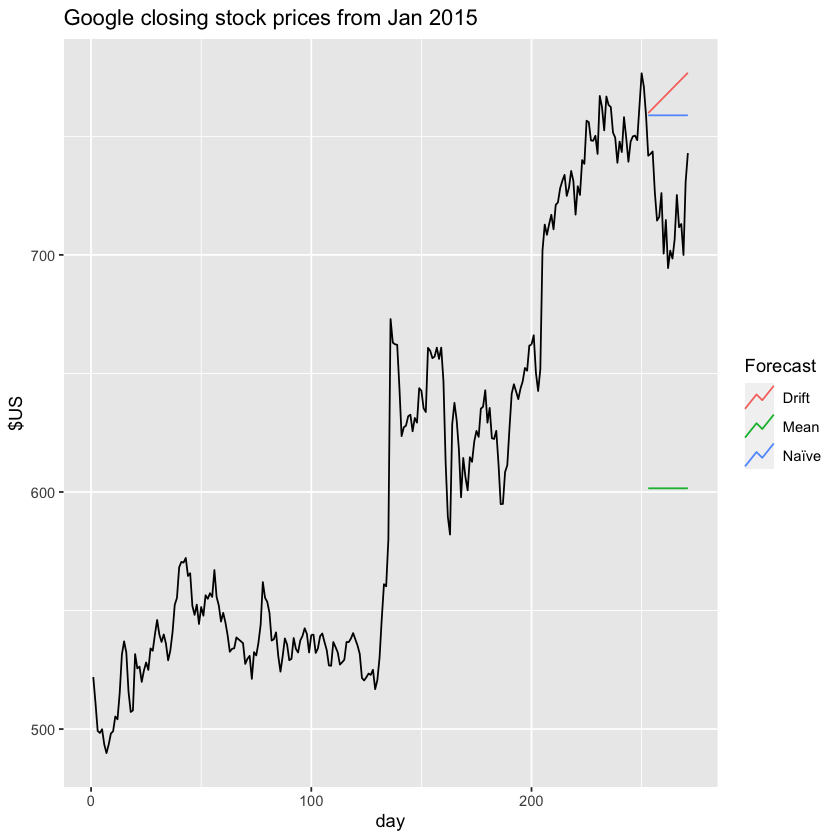

In [197]:
google_fc %>%
  autoplot(bind_rows(google_2015, google_jan_2016), # la data original y los pronosticos
    level = NULL) +
  labs(y = "$US",
       title = "Google closing stock prices from Jan 2015") +
  guides(colour = guide_legend(title = "Forecast"))

In [198]:
accuracy(google_fc, google_stock)


.model Symbol .type ME        RMSE      MAE       MPE       MAPE     
1 Drift  GOOG   Test  -49.82414  53.06958  49.82414 -6.992133  6.992133
2 Mean   GOOG   Test  116.94525 118.03221 116.94525 16.235169 16.235169
3 Naïve  GOOG   Test  -40.38421  43.43152  40.38421 -5.672675  5.672675
  MASE      RMSSE     ACF1     
1  6.989934  4.742766 0.6038189
2 16.406494 10.548401 0.4963855
3  5.665586  3.881424 0.4963855

conclution: 
- the best method is the Naïve method (regardless of which accuracy measure is used).

# 9. Evaluating distributional forecast accuracy

The preceding measures all measure point forecast accuracy. When evaluating distributional forecasts, we need to use some other measures.

- Quantiles Scores. 

accuracy(google_stock, list(qs=quantile_score), probs=0.10)


- Winkler Scores. 

accuracy(google_stock, list(winkler = winkler_score), level = 80)


- Continuous Ranked Probability Score

accuracy(google_stock, list(crps = CRPS))


- Scale-free comparisons using skill scores

accuracy(google_stock, list(skill = skill_score(CRPS)))

# 1. QUANTILES SCORES

In [199]:
google_fc

Symbol .model day Close        .mean    Date       Open   High    Low    
1  GOOG   Mean   253 N(602, 6766) 601.5505 2016-01-04 743.00 744.060 731.258
2  GOOG   Mean   254 N(602, 6766) 601.5505 2016-01-05 746.45 752.000 738.640
3  GOOG   Mean   255 N(602, 6766) 601.5505 2016-01-06 730.00 747.180 728.920
4  GOOG   Mean   256 N(602, 6766) 601.5505 2016-01-07 730.31 738.500 719.060
5  GOOG   Mean   257 N(602, 6766) 601.5505 2016-01-08 731.45 733.230 713.000
6  GOOG   Mean   258 N(602, 6766) 601.5505 2016-01-11 716.61 718.855 703.540
7  GOOG   Mean   259 N(602, 6766) 601.5505 2016-01-12 721.68 728.750 717.317
8  GOOG   Mean   260 N(602, 6766) 601.5505 2016-01-13 730.85 734.740 698.610
9  GOOG   Mean   261 N(602, 6766) 601.5505 2016-01-14 705.38 721.925 689.100
10 GOOG   Mean   262 N(602, 6766) 601.5505 2016-01-15 692.29 706.740 685.370
11 GOOG   Mean   263 N(602, 6766) 601.5505 2016-01-19 703.30 709.980 693.410
12 GOOG   Mean   264 N(602, 6766) 601.5505 2016-01-20 688.61 706.850 673.260
13 GOOG   Mean   265 N(602, 6766) 601.5505 2016-01-21 702.18 719.190 694.460
14 GOOG   Mean   266 N(602, 6766) 601.5505 2016-01-22 723.60 728.130 720.121
15 GOOG   Mean   267 N(602, 6766) 601.5505 2016-01-25 723.58 729.680 710.010
16 GOOG   Mean   268 N(602, 6766) 601.5505 2016-01-26 713.85 718.280 706.480
17 GOOG   Mean   269 N(602, 6766) 601.5505 2016-01-27 713.67 718.235 694.390
18 GOOG   Mean   270 N(602, 6766) 601.5505 2016-01-28 722.22 733.690 712.350
19 GOOG   Mean   271 N(602, 6766) 601.5505 2016-01-29 731.53 744.990 726.800
20 GOOG   Naïve  253 N(759, 125)  758.8800 2016-01-04 743.00 744.060 731.258
21 GOOG   Naïve  254 N(759, 250)  758.8800 2016-01-05 746.45 752.000 738.640
22 GOOG   Naïve  255 N(759, 376)  758.8800 2016-01-06 730.00 747.180 728.920
23 GOOG   Naïve  256 N(759, 501)  758.8800 2016-01-07 730.31 738.500 719.060
24 GOOG   Naïve  257 N(759, 626)  758.8800 2016-01-08 731.45 733.230 713.000
25 GOOG   Naïve  258 N(759, 751)  758.8800 2016-01-11 716.61 718.855 703.540
26 GOOG   Naïve  259 N(759, 876)  758.8800 2016-01-12 721.68 728.750 717.317
27 GOOG   Naïve  260 N(759, 1002) 758.8800 2016-01-13 730.85 734.740 698.610
28 GOOG   Naïve  261 N(759, 1127) 758.8800 2016-01-14 705.38 721.925 689.100
29 GOOG   Naïve  262 N(759, 1252) 758.8800 2016-01-15 692.29 706.740 685.370
30 GOOG   Naïve  263 N(759, 1377) 758.8800 2016-01-19 703.30 709.980 693.410
31 GOOG   Naïve  264 N(759, 1502) 758.8800 2016-01-20 688.61 706.850 673.260
32 GOOG   Naïve  265 N(759, 1628) 758.8800 2016-01-21 702.18 719.190 694.460
33 GOOG   Naïve  266 N(759, 1753) 758.8800 2016-01-22 723.60 728.130 720.121
34 GOOG   Naïve  267 N(759, 1878) 758.8800 2016-01-25 723.58 729.680 710.010
35 GOOG   Naïve  268 N(759, 2003) 758.8800 2016-01-26 713.85 718.280 706.480
36 GOOG   Naïve  269 N(759, 2129) 758.8800 2016-01-27 713.67 718.235 694.390
37 GOOG   Naïve  270 N(759, 2254) 758.8800 2016-01-28 722.22 733.690 712.350
38 GOOG   Naïve  271 N(759, 2379) 758.8800 2016-01-29 731.53 744.990 726.800
39 GOOG   Drift  253 N(760, 125)  759.8240 2016-01-04 743.00 744.060 731.258
40 GOOG   Drift  254 N(761, 251)  760.7680 2016-01-05 746.45 752.000 738.640
41 GOOG   Drift  255 N(762, 377)  761.7120 2016-01-06 730.00 747.180 728.920
42 GOOG   Drift  256 N(763, 505)  762.6560 2016-01-07 730.31 738.500 719.060
43 GOOG   Drift  257 N(764, 634)  763.6000 2016-01-08 731.45 733.230 713.000
44 GOOG   Drift  258 N(765, 764)  764.5440 2016-01-11 716.61 718.855 703.540
45 GOOG   Drift  259 N(765, 895)  765.4880 2016-01-12 721.68 728.750 717.317
46 GOOG   Drift  260 N(766, 1026) 766.4319 2016-01-13 730.85 734.740 698.610
47 GOOG   Drift  261 N(767, 1159) 767.3759 2016-01-14 705.38 721.925 689.100
48 GOOG   Drift  262 N(768, 1293) 768.3199 2016-01-15 692.29 706.740 685.370
49 GOOG   Drift  263 N(769, 1428) 769.2639 2016-01-19 703.30 709.980 693.410
50 GOOG   Drift  264 N(770, 1563) 770.2079 2016-01-20 688.61 706.850 673.260
51 GOOG   Drift  265 N(771, 1700) 771.1519 2016-01-21 702.18 719.190 694.460

If I want  an 80% prediction interval for the forecasts from the Naïve method.

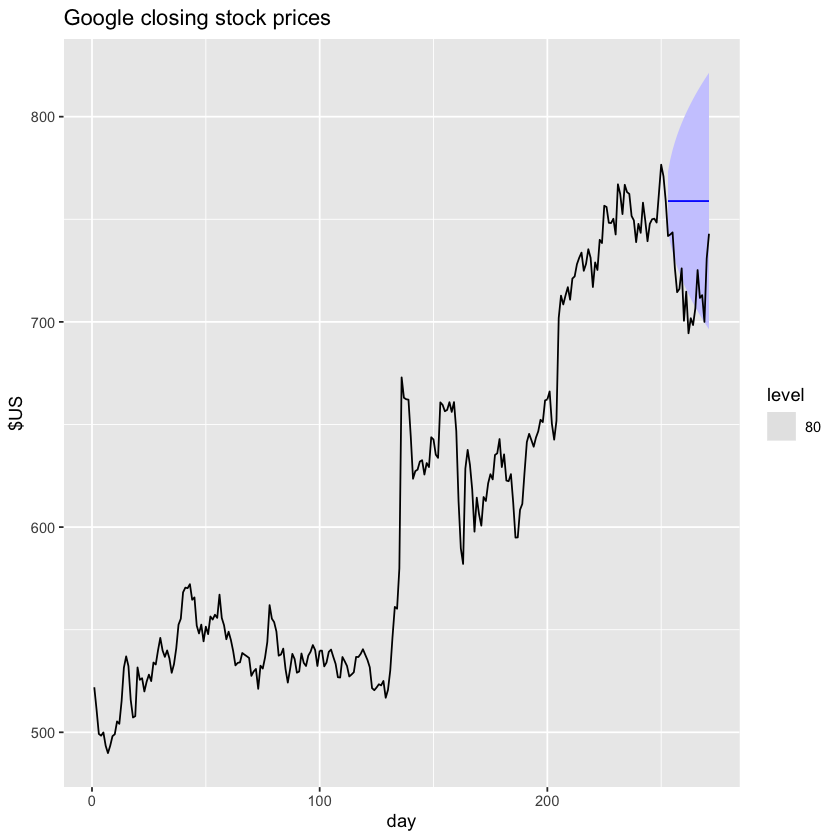

In [205]:
google_fc %>%
 filter(.model=="Naïve") %>%   #.model is the title of the variable
 
 autoplot(bind_rows(google_2015, google_jan_2016), level=80) +
labs(y = "$US",
       title = "Google closing stock prices")

### TO COMPLETE:

# 10. Time series cross-validation

A more sophisticated version of training/test sets is time series cross-validation.

- There are a series of test sets, each consisting of a single observation.
- The corresponding training set consists only of observations that occurred prior to the observation that forms the test set.
- The forecast accuracy is computed by averaging over the test sets. 

In [3]:
# Re-index based on trading days
google_stock <- gafa_stock %>%
  filter(Symbol == "GOOG", year(Date) >= 2015) %>%
  mutate(day = row_number()) %>%
  update_tsibble(index = day, regular = TRUE)
# Filter the year of interest
google_2015 <- google_stock %>% filter(year(Date) == 2015)

- The stretch_tsibble() function is used to create many training sets. 
- Start with a training set of length .init=3, 
- Then, increasing the size of successive training sets by .step=1.

- .id column provides a new key indicating the various training sets.
 example: 1 1 1; 2 2 2 2; 3,3,3,3 ....

In [5]:
# Time series cross-validation accuracy
google_2015_tr <- google_2015 %>%
  stretch_tsibble(.init = 3, .step = 1) %>%
  relocate(Date, Symbol, .id)
google_2015_tr # this contains the training set

Date       Symbol .id Open     High     Low      Close    Adj_Close
1     2015-01-02 GOOG   1   526.1147 528.3624 521.2316 521.9377 521.9377 
2     2015-01-05 GOOG   1   520.3962 521.4604 510.2520 511.0576 511.0576 
3     2015-01-06 GOOG   1   512.1815 513.3500 498.3078 499.2128 499.2128 
4     2015-01-02 GOOG   2   526.1147 528.3624 521.2316 521.9377 521.9377 
5     2015-01-05 GOOG   2   520.3962 521.4604 510.2520 511.0576 511.0576 
6     2015-01-06 GOOG   2   512.1815 513.3500 498.3078 499.2128 499.2128 
7     2015-01-07 GOOG   2   504.2252 504.4679 496.9154 498.3575 498.3575 
8     2015-01-02 GOOG   3   526.1147 528.3624 521.2316 521.9377 521.9377 
9     2015-01-05 GOOG   3   520.3962 521.4604 510.2520 511.0576 511.0576 
10    2015-01-06 GOOG   3   512.1815 513.3500 498.3078 499.2128 499.2128 
11    2015-01-07 GOOG   3   504.2252 504.4679 496.9154 498.3575 498.3575 
12    2015-01-08 GOOG   3   495.2645 500.7245 488.3128 499.9289 499.9289 
13    2015-01-02 GOOG   4   526.1147 528.3624 521.2316 521.9377 521.9377 
14    2015-01-05 GOOG   4   520.3962 521.4604 510.2520 511.0576 511.0576 
15    2015-01-06 GOOG   4   512.1815 513.3500 498.3078 499.2128 499.2128 
16    2015-01-07 GOOG   4   504.2252 504.4679 496.9154 498.3575 498.3575 
17    2015-01-08 GOOG   4   495.2645 500.7245 488.3128 499.9289 499.9289 
18    2015-01-09 GOOG   4   501.9975 502.1566 492.0821 493.4545 493.4545 
19    2015-01-02 GOOG   5   526.1147 528.3624 521.2316 521.9377 521.9377 
20    2015-01-05 GOOG   5   520.3962 521.4604 510.2520 511.0576 511.0576 
21    2015-01-06 GOOG   5   512.1815 513.3500 498.3078 499.2128 499.2128 
22    2015-01-07 GOOG   5   504.2252 504.4679 496.9154 498.3575 498.3575 
23    2015-01-08 GOOG   5   495.2645 500.7245 488.3128 499.9289 499.9289 
24    2015-01-09 GOOG   5   501.9975 502.1566 492.0821 493.4545 493.4545 
25    2015-01-12 GOOG   5   492.2312 493.2616 484.8916 489.8543 489.8543 
26    2015-01-02 GOOG   6   526.1147 528.3624 521.2316 521.9377 521.9377 
27    2015-01-05 GOOG   6   520.3962 521.4604 510.2520 511.0576 511.0576 
28    2015-01-06 GOOG   6   512.1815 513.3500 498.3078 499.2128 499.2128 
29    2015-01-07 GOOG   6   504.2252 504.4679 496.9154 498.3575 498.3575 
30    2015-01-08 GOOG   6   495.2645 500.7245 488.3128 499.9289 499.9289 
⋮     ⋮          ⋮      ⋮   ⋮        ⋮        ⋮        ⋮        ⋮        
31846 2015-11-18 GOOG   250 727.58   741.410  727.000  740.00   740.00   
31847 2015-11-19 GOOG   250 738.74   742.000  737.430  738.41   738.41   
31848 2015-11-20 GOOG   250 746.53   757.920  743.000  756.60   756.60   
31849 2015-11-23 GOOG   250 757.45   762.708  751.820  755.98   755.98   
31850 2015-11-24 GOOG   250 752.00   755.279  737.630  748.28   748.28   
31851 2015-11-25 GOOG   250 748.14   752.000  746.060  748.15   748.15   
31852 2015-11-27 GOOG   250 748.46   753.410  747.490  750.26   750.26   
31853 2015-11-30 GOOG   250 748.81   754.930  741.270  742.60   742.60   
31854 2015-12-01 GOOG   250 747.11   768.950  746.700  767.04   767.04   
31855 2015-12-02 GOOG   250 768.90   775.955  758.960  762.38   762.38   
31856 2015-12-03 GOOG   250 766.01   768.995  745.630  752.54   752.54   
31857 2015-12-04 GOOG   250 753.10   768.490  750.000  766.81   766.81   
31858 2015-12-07 GOOG   250 767.77   768.730  755.090  763.25   763.25   
31859 2015-12-08 GOOG   250 757.89   764.800  754.200  762.37   762.37   
31860 2015-12-09 GOOG   250 759.17   764.230  737.001  751.61   751.61   
31861 2015-12-10 GOOG   250 752.85   755.850  743.830  749.46   749.46   
31862 2015-12-11 GOOG   250 741.16   745.710  736.750  738.87   738.87   
31863 2015-12-14 GOOG   250 741.79   748.730  724.170  747.77   747.77   
31864 2015-12-15 GOOG   250 753.00   758.080  743.010  743.40   743.40   
31865 2015-12-16 GOOG   250 750.00   760.590  739.435  758.09   758.09   
31866 2015-12-17 GOOG   250 762.42   762.680  749.000  749.43   749.43   
31867 2015-12-18 GOOG   250 746.51   754.130  738.150  739.31   739.31   
31868 2015

- accuracy() function can be used to evaluate the forecasts accuracy across the training sets.

Given the training set, I choose the model and I do a forecast one period head,
then i calculate the accuracy

In [9]:
# TSCV accuracy: CROSS VALIDATION
google_2015_tr %>%
  model(RW(Close ~ drift())) %>%
  forecast(h = 1) %>%
  accuracy(google_2015) # I need to write the full data.

Warning message:
“The future dataset is incomplete, incomplete out-of-sample data will be treated as missing. 
1 observation is missing at 253”


.model              Symbol .type ME        RMSE     MAE     MPE      
1 RW(Close ~ drift()) GOOG   Test  0.7264388 11.26819 7.26124 0.1115235
  MAPE     MASE     RMSSE    ACF1      
1 1.194024 1.018695 1.007025 0.09848564

In [13]:
# Training set accuracy: ONLY TRAINING
google_2015 %>%
  model(RW(Close ~ drift())) %>%
  accuracy() 

Symbol .model              .type    ME            RMSE     MAE    MPE        
1 GOOG   RW(Close ~ drift()) Training -2.966641e-14 11.14969 7.1624 -0.02666556
  MAPE     MASE     RMSSE    ACF1      
1 1.177373 1.004828 0.996435 0.09755315

# Example: Forecast horizon accuracy with cross-validation


In [17]:
google_2015_tr <- google_2015 %>%
  stretch_tsibble(.init = 3, .step = 1)

google_2015_tr

Symbol Date       Open     High     Low      Close    Adj_Close Volume 
1     GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600
2     GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800
3     GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900
4     GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600
5     GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800
6     GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900
7     GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100
8     GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600
9     GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800
10    GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900
11    GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100
12    GOOG   2015-01-08 495.2645 500.7245 488.3128 499.9289 499.9289  3353600
13    GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600
14    GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800
15    GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900
16    GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100
17    GOOG   2015-01-08 495.2645 500.7245 488.3128 499.9289 499.9289  3353600
18    GOOG   2015-01-09 501.9975 502.1566 492.0821 493.4545 493.4545  2069400
19    GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600
20    GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800
21    GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900
22    GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100
23    GOOG   2015-01-08 495.2645 500.7245 488.3128 499.9289 499.9289  3353600
24    GOOG   2015-01-09 501.9975 502.1566 492.0821 493.4545 493.4545  2069400
25    GOOG   2015-01-12 492.2312 493.2616 484.8916 489.8543 489.8543  2322400
26    GOOG   2015-01-02 526.1147 528.3624 521.2316 521.9377 521.9377  1447600
27    GOOG   2015-01-05 520.3962 521.4604 510.2520 511.0576 511.0576  2059800
28    GOOG   2015-01-06 512.1815 513.3500 498.3078 499.2128 499.2128  2899900
29    GOOG   2015-01-07 504.2252 504.4679 496.9154 498.3575 498.3575  2065100
30    GOOG   2015-01-08 495.2645 500.7245 488.3128 499.9289 499.9289  3353600
⋮     ⋮      ⋮          ⋮        ⋮        ⋮        ⋮        ⋮         ⋮      
31846 GOOG   2015-11-18 727.58   741.410  727.000  740.00   740.00    1684300
31847 GOOG   2015-11-19 738.74   742.000  737.430  738.41   738.41    1327100
31848 GOOG   2015-11-20 746.53   757.920  743.000  756.60   756.60    2212300
31849 GOOG   2015-11-23 757.45   762.708  751.820  755.98   755.98    1414500
31850 GOOG   2015-11-24 752.00   755.279  737.630  748.28   748.28    2333100
31851 GOOG   2015-11-25 748.14   752.000  746.060  748.15   748.15    1122100
31852 GOOG   2015-11-27 748.46   753.410  747.490  750.26   750.26     838500
31853 GOOG   2015-11-30 748.81   754.930  741.270  742.60   742.60    2097600
31854 GOOG   2015-12-01 747.11   768.950  746.700  767.04   767.04    2134600
31855 GOOG   2015-12-02 768.90   775.955  758.960  762.38   762.38    2230400
31856 GOOG   2015-12-03 766.01   768.995  745.630  752.54   752.54    2590600
31857 GOOG   2015-12-04 753.10   768.490  750.000  766.81   766.81    2757300
31858 GOOG   2015-12-07 767.77   768.730  755.090  763.25   763.25    1812300
31859 GOOG   2015-12-08 757.89   764.800  754.200  762.37   762.37    1829500
31860 GOOG   2015-12-09 759.17   764.230  737.001  751.61   751.61    2700000
31861 GOOG   2015-12-10 752.85   755.850  743.830  749.46   749.46    1984900
31862 GOOG   2015-12-11 741.16   745.710  736.750  738.87   738.87    2224400
31863 GOOG   2015-12-14 741.79   748.730  724.170  747.77   747.77    2412500
31864 GOOG   2015-12-15 753.00   758.080  743.010  743.40   743.40    2666200
31865 GOOG   2015-12-16 750.

In [15]:
fc <- google_2015_tr %>%
  model(RW(Close ~ drift())) %>%
  forecast(h = 8) %>%
  group_by(.id) %>%
  mutate(h = row_number()) %>%
  ungroup()

In [16]:
fc

.id Symbol .model              day Close        .mean    h
1    1   GOOG   RW(Close ~ drift())  4  N(488, 0.47) 487.8503 1
2    1   GOOG   RW(Close ~ drift())  5  N(476, 1.4)  476.4879 2
3    1   GOOG   RW(Close ~ drift())  6  N(465, 2.8)  465.1254 3
4    1   GOOG   RW(Close ~ drift())  7  N(454, 4.7)  453.7629 4
5    1   GOOG   RW(Close ~ drift())  8  N(442, 7)    442.4004 5
6    1   GOOG   RW(Close ~ drift())  9  N(431, 9.8)  431.0380 6
7    1   GOOG   RW(Close ~ drift()) 10  N(420, 13)   419.6755 7
8    1   GOOG   RW(Close ~ drift()) 11  N(408, 17)   408.3130 8
9    2   GOOG   RW(Close ~ drift())  5  N(490, 37)   490.4974 1
10   2   GOOG   RW(Close ~ drift())  6  N(483, 99)   482.6374 2
11   2   GOOG   RW(Close ~ drift())  7  N(475, 185)  474.7773 3
12   2   GOOG   RW(Close ~ drift())  8  N(467, 296)  466.9172 4
13   2   GOOG   RW(Close ~ drift())  9  N(459, 432)  459.0571 5
14   2   GOOG   RW(Close ~ drift()) 10  N(451, 593)  451.1971 6
15   2   GOOG   RW(Close ~ drift()) 11  N(443, 778)  443.3370 7
16   2   GOOG   RW(Close ~ drift()) 12  N(435, 988)  435.4769 8
17   3   GOOG   RW(Close ~ drift())  6  N(494, 47)   494.4266 1
18   3   GOOG   RW(Close ~ drift())  7  N(489, 117)  488.9244 2
19   3   GOOG   RW(Close ~ drift())  8  N(483, 211)  483.4222 3
20   3   GOOG   RW(Close ~ drift())  9  N(478, 328)  477.9200 4
21   3   GOOG   RW(Close ~ drift()) 10  N(472, 469)  472.4178 5
22   3   GOOG   RW(Close ~ drift()) 11  N(467, 634)  466.9155 6
23   3   GOOG   RW(Close ~ drift()) 12  N(461, 821)  461.4133 7
24   3   GOOG   RW(Close ~ drift()) 13  N(456, 1032) 455.9111 8
25   4   GOOG   RW(Close ~ drift())  7  N(488, 35)   487.7578 1
26   4   GOOG   RW(Close ~ drift())  8  N(482, 85)   482.0612 2
27   4   GOOG   RW(Close ~ drift())  9  N(476, 149)  476.3646 3
28   4   GOOG   RW(Close ~ drift()) 10  N(471, 226)  470.6679 4
29   4   GOOG   RW(Close ~ drift()) 11  N(465, 318)  464.9713 5
30   4   GOOG   RW(Close ~ drift()) 12  N(459, 425)  459.2746 6
⋮    ⋮   ⋮      ⋮                   ⋮   ⋮            ⋮        ⋮
1971 247 GOOG   RW(Close ~ drift()) 252 N(765, 377)  765.4202 3
1972 247 GOOG   RW(Close ~ drift()) 253 N(766, 505)  766.3902 4
1973 247 GOOG   RW(Close ~ drift()) 254 N(767, 634)  767.3603 5
1974 247 GOOG   RW(Close ~ drift()) 255 N(768, 764)  768.3303 6
1975 247 GOOG   RW(Close ~ drift()) 256 N(769, 894)  769.3004 7
1976 247 GOOG   RW(Close ~ drift()) 257 N(770, 1026) 770.2704 8
1977 248 GOOG   RW(Close ~ drift()) 251 N(778, 125)  777.6227 1
1978 248 GOOG   RW(Close ~ drift()) 252 N(779, 251)  778.6455 2
1979 248 GOOG   RW(Close ~ drift()) 253 N(780, 378)  779.6682 3
1980 248 GOOG   RW(Close ~ drift()) 254 N(781, 506)  780.6909 4
1981 248 GOOG   RW(Close ~ drift()) 255 N(782, 635)  781.7137 5
1982 248 GOOG   RW(Close ~ drift()) 256 N(783, 765)  782.7364 6
1983 248 GOOG   RW(Close ~ drift()) 257 N(784, 896)  783.7592 7
1984 248 GOOG   RW(Close ~ drift()) 258 N(785, 1028) 784.7819 8
1985 249 GOOG   RW(Close ~ drift()) 252 N(772, 125)  771.9962 1
1986 249 GOOG   RW(Close ~ drift()) 253 N(773, 250)  772.9925 2
1987 249 GOOG   RW(Close ~ drift()) 254 N(774, 377)  773.9887 3
1988 249 GOOG   RW(Close ~ drift()) 255 N(775, 504)  774.9850 4
1989 249 GOOG   RW(Close ~ drift()) 256 N(776, 633)  775.9812 5
1990 249 GOOG   RW(Close ~ drift()) 257 N(777, 763)  776.9775 6
1991 249 GOOG   RW(Close ~ drift()) 258 N(778, 893)  777.9737 7
1992 249 GOOG   RW(Close ~ drift()) 259 N(779, 1025) 778.9700 8
1993 250 GOOG   RW(Close ~ drift()) 253 N(760, 125)  759.8240 1
1994 250 GOOG   RW(Close ~ drift()) 254 N(761, 251)  760.7680 2
1995 250 GOOG   RW(Close ~ drift()) 255 N(762, 377)  761.7120 3
1996 250 GOOG   RW(Close ~ drift()) 256 N(763, 505)  762.6560 4
1997 250 GOOG   RW(Close ~ drift()) 257 N(764, 634)  763.6000 5
1998 250 GOOG   RW(Close ~ drift()) 258 N(765, 764)  764.5440 6
1999 250 GOOG   RW(Close ~ drift()) 259 N(765, 895)  765.4880 7
2000 250 GOOG   RW(Close ~ drift()) 260 N(766, 1026) 766.4319 8

- evaluates the forecasting performance of 1- to 8-step-ahead drift forecasts.

In [20]:
fc %>%
  accuracy(google_2015, by = c("h", ".model"))

Warning message:
“The future dataset is incomplete, incomplete out-of-sample data will be treated as missing. 
8 observations are missing between 253 and 260”


h .model              .type ME        RMSE     MAE      MPE       MAPE    
1 1 RW(Close ~ drift()) Test  0.7264388 11.26819  7.26124 0.1115235 1.194024
2 2 RW(Close ~ drift()) Test  1.5190899 16.85747 10.99240 0.2280708 1.819820
3 3 RW(Close ~ drift()) Test  2.3428580 20.71070 13.98383 0.3502268 2.322461
4 4 RW(Close ~ drift()) Test  3.1498238 23.74024 15.97066 0.4742304 2.648185
5 5 RW(Close ~ drift()) Test  3.9273132 26.37659 17.69629 0.5962574 2.936460
6 6 RW(Close ~ drift()) Test  4.7120052 28.74952 19.33435 0.7184547 3.206346
7 7 RW(Close ~ drift()) Test  5.4903985 31.17675 21.32665 0.8373921 3.533784
8 8 RW(Close ~ drift()) Test  6.2697463 33.31126 22.62771 0.9578001 3.748434
  MASE     RMSSE    ACF1      
1 1.018695 1.007025 0.09848564
2 1.542147 1.506532 0.50900442
3 1.961821 1.850891 0.66791502
4 2.240558 2.121638 0.74928715
5 2.482650 2.357245 0.79138037
6 2.712457 2.569311 0.82667521
7 2.991961 2.786229 0.83272043
8 3.174489 2.976988 0.84814328

Warning message:
“The future dataset is incomplete, incomplete out-of-sample data will be treated as missing. 
8 observations are missing between 253 and 260”


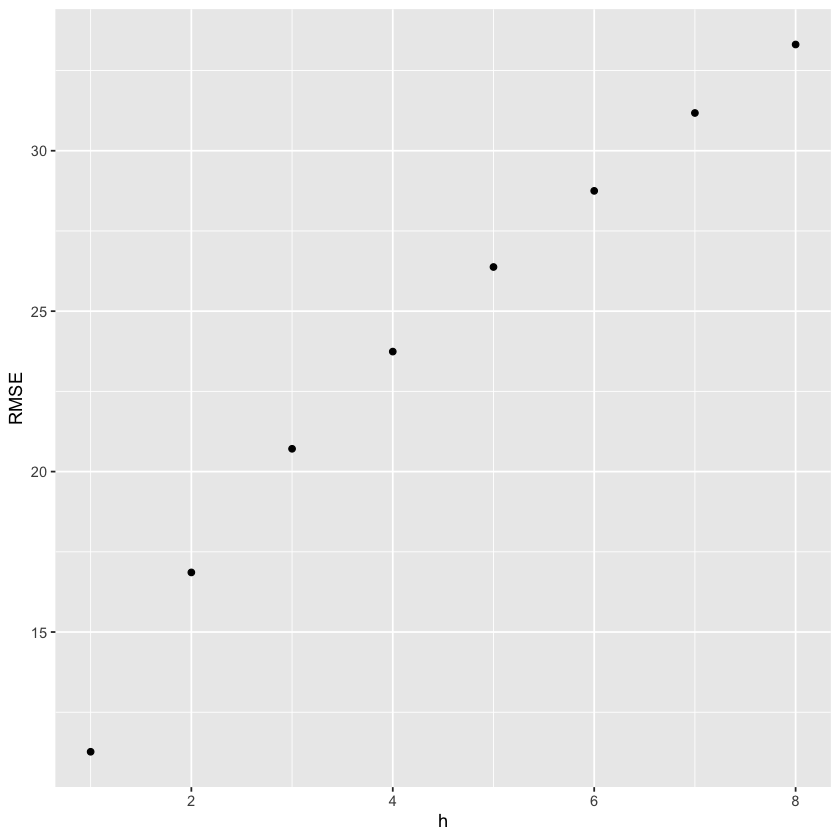

In [21]:
fc %>%
  accuracy(google_2015, by = c("h", ".model")) %>%
  ggplot(aes(x = h, y = RMSE)) +
  geom_point()

 - RMSE as a function of forecast horizon for the Drift method applied to Google closing stock prices.
 - the forecast error increases as the forecast horizon increases, as we would expect.